# Neanderthal admixture in Yemen and others
Comparative visualization for Yemeni genomes, HGDP and arabian Peninsula (APPG, Al Marri et al).
Only focusing on variants confidently called as Neanderthal by:
https://web.cs.ucla.edu/~sriram/software.html
Preparation of snp counts per sample, see hydrogen: 
`/home/ahenschel/YemenGenomeAnalysis/Neanderthal/Scripts/countNeanderAdmix2.py`

This notebook requires hydrogen sambashare to be mounted, needs:
`neanderPandas_{EUR,ASN,EUR-ASN}.csv.gz`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 40]
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_98452/3373530985.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
yemen = pd.read_excel("../Metadata/Yemen Codes.xlsx", sheet_name="WGS samples").set_index('sid')
hgdpMeta = "../Data/HGDP/HGDPid_populations.csv.gz"
hgdp = pd.read_csv(hgdpMeta).set_index('Id')

In [4]:
yemen.head()

yaid  region   yhaplo        mt    Unnamed: 5
sid                                                               
EGAN00001456743  Yemen-38   Taizz    J-P58       H20  Western Asia
EGAN00001456617  Yemen-22   Bayda    J-P58      H2a1  Western Asia
EGAN00001456660  Yemen-29   Saada    J-P58  HV1a'b'c     Near East
EGAN00001456573  Yemen-14  Mahwit    J-P58     HV1b1     Near East
EGAN00001456593  Yemen-10   Amran  G-F1761       J1b           NaN

In [5]:
from collections import Counter
appg = pd.read_csv("../Metadata/appg.meta.csv", sep=' ').set_index('long_ID')
appg.head()

short_ID pop_ID  \
long_ID                                                               
longranger222_wgs_26958_APPG7555879_GRCh38_gatk  APPG7555879  UAE19   
longranger222_wgs_26964_APPG7555867_GRCh38_gatk  APPG7555867   UAE6   
longranger222_wgs_28420_APPG7555897_GRCh38_gatk  APPG7555897  UAE37   
longranger222_wgs_28927_APPG7555899_GRCh38_gatk  APPG7555899  UAE39   
longranger222_wgs_28927_APPG7555900_GRCh38_gatk  APPG7555900  UAE40   

                                                population annotation  
long_ID                                                                
longranger222_wgs_26958_APPG7555879_GRCh38_gatk        UAE   EmiratiD  
longranger222_wgs_26964_APPG7555867_GRCh38_gatk        UAE   EmiratiC  
longranger222_wgs_28420_APPG7555897_GRCh38_gatk        UAE   EmiratiC  
longranger222_wgs_28927_APPG7555899_GRCh38_gatk        UAE   EmiratiB  
longranger222_wgs_28927_APPG7555900_GRCh38_gatk        UAE   EmiratiC

In [6]:
Counter(appg.population)

Counter({'UAE': 57,
         'SAUDI': 28,
         'IRAQ': 13,
         'YEMEN': 21,
         'SYRIA': 12,
         'OMAN': 3,
         'JORDAN': 3})

In [7]:
def fixHeader(col):
    """adds more sample info, infered from sample ID"""
    if col.startswith('longranger'): return col.split('_')[3]
    #if col.startswith('HGDP'): return hgdp.loc[col].Pop7Groups+'_'+col[-5:]
    if col.startswith('EGAN'): 
        if not col in yemen.index: return 'Yemen'+col
        return 'Yemen'+yemen.loc[col].region+'_'+col[-7:]
    return col

    

In [8]:

## as the merging of chromosome tables takes some time, the result is dumped in a csv with an extra column for 
## chromosome, no need to run this again, once done!
def prepTable(chrom,whichNean='ASN', autofix=True):    
    chr22=f'../Neanderthal/neanderPandas_{whichNean}_{chrom}.csv.gz'
    chr22=pd.read_csv(chr22, index_col=0)
    ## fixing those SNPs that are flipped, i.e. ref has Neanderthal version
    ac = np.array(chr22.sum(axis=1))
    if autofix:
        chr22.iloc[np.where(ac>1000)[0]] = 2-chr22.iloc[np.where(ac>1000)[0]]
    chr22['Chrom'] = chrom
    return chr22

precalc = True
if not precalc:
    whichNean='EUR-ASN'
    nean = pd.concat(prepTable(chrom, whichNean) for chrom in range(1, 23))
    nean.columns = [fixHeader(col) for col in nean.columns.values]
    nean.to_csv(f"../Neanderthal/neanderPandas_{whichNean}.csv.gz")
else:
    whichNean = 'EUR-ASN'
    nean = pd.read_csv(f'../Neanderthal/neanderPandas_{whichNean}.csv.gz')
nean.head()

Pos  YemenLahij_1456627  YemenAmran_1456593  YemenHudayda_1456774  \
0  2996671                 0.0                 0.0                   0.0   
1  2998770                 0.0                 0.0                   0.0   
2  3001665                 0.0                 0.0                   0.0   
3  3002343                 0.0                 0.0                   0.0   
4  3020986                 0.0                 0.0                   0.0   

   YemenMahwit_1456680  YemenMahwit_1456573  YemenDhamar_1456564  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   YemenHudayda_1456765  YemenHadramout_1456602  YemenSaada_1456705  ...  \
0                   0.0                     0.0                 0.0  ...   
1                   0.0                     0.0                 0.0  ...   
2                   0.0                     0.0                 0.0  ...   
3                   0.0                     0.0                 0.0  ...   
4                   0.0                     0.0                 0.0  ...   

   APPG7623343  GRCh38.10  APPG7623345  GRCh38.11  APPG7623347  APPG7623348  \
0          0.0        0.0          0.0        0.0          0.0          0.0   
1          0.0        0.0          0.0        0.0          0.0          0.0   
2          0.0        0.0          0.0        0.0          0.0          0.0   
3          0.0        0.0          0.0        0.0          0.0          0.0   
4          0.0        0.0          0.0        0.0          0.0          0.0   

   GRCh38.12  APPG7623350  APPG7623351  Chrom  
0        0.0          0.0          0.0      1  
1        0.0          0.0          0.0      1  
2        0.0          0.0          0.0      1  
3        0.0          0.0          0.0      1  
4        0.0          0.0          0.0      1  

[5 rows x 1114 columns]

In [36]:
%pprint

Pretty printing has been turned OFF


In [50]:
%pprint
', '.join(list(nean.columns.values))

Pretty printing has been turned OFF


'Pos, YemenLahij_1456627, YemenAmran_1456593, YemenHudayda_1456774, YemenMahwit_1456680, YemenMahwit_1456573, YemenDhamar_1456564, YemenHudayda_1456765, YemenHadramout_1456602, YemenSaada_1456705, YemenAbyan_1456614, YemenSaada_1456660, YemenAmran_1456663, YemenTaizz_1456737, YemenIbb_1456568, YemenMahwit_1456622, YemenMahwit_1456650, YemenTaizz_1456743, YemenBayda_1456603, YemenAbyan_1456674, YemenMaarib_1456634, YemenTaizz_1456748, YemenHadramout_1456613, YemenAbyan_1456688, YemenHudayda_1456561, YemenIbb_1456560, YemenBayda_1456617, YemenIbb_1456637, YemenEGAN00001456590, YemenHadramout_1456629, YemenMaarib_1456675, YemenMaarib_1456690, YemenMaarib_1456620, YemenHudayda_1456745, YemenDhamar_1456684, YemenAmran_1456648, YemenAbyan_1456628, YemenSaada_1456676, YemenIbb_1456592, YemenDhamar_1455435, YemenLahij_1456657, YemenAmran_1456579, YemenSaada_1456615, YemenTaizz_1456732, YemenDhamar_1456668, YemenHudayda_1456769, YemenHadramout_1456587, Africa_01201, Africa_00479, Africa_01408, 

In [9]:
from collections import Counter
hgdp1 = hgdp[hgdp.Region.isin(('Europe', 'Middle_Est', 'Central_South_Asia'))]
Counter(hgdp1.population)

Counter({'Adygei': 17,
         'French': 29,
         'French_Basque': 24,
         'North_Italian': 14,
         'Orcadian': 16,
         'Russian': 25,
         'Sardinian': 28,
         'Tuscan': 8,
         'Bedouin': 49,
         'Druze': 48,
         'Palestinian': 51})

In [52]:
hgdp.head()

Sex  population Geographic_origin              Region Pop7Groups
Id                                                                        
HGDP01405   M  Bantu_N.E.             Kenya  Subsaharian_Africa     Africa
HGDP01406   M  Bantu_N.E.             Kenya  Subsaharian_Africa     Africa
HGDP01408   M  Bantu_N.E.             Kenya  Subsaharian_Africa     Africa
HGDP01411   M  Bantu_N.E.             Kenya  Subsaharian_Africa     Africa
HGDP01412   M  Bantu_N.E.             Kenya  Subsaharian_Africa     Africa

In [10]:
def popfix(pop):
    if pop.startswith('Bantu'): return 'Bantu'
    return pop
hgdp.population = [popfix(pop) for pop in hgdp.population]
hgdp.population.value_counts()

Palestinian       51
Bedouin           49
Druze             48
Han               45
Biaka_Pygmies     36
Japanese          31
Mozabite          30
French            29
Sardinian         28
Maya              25
Makrani           25
Russian           25
Yoruba            25
Sindhi            25
Pima              25
Pathan            25
Kalash            25
Hazara            25
Yakut             25
Brahui            25
Balochi           25
Burusho           25
Karitiana         24
French_Basque     24
Mandenka          24
NAN_Melanesian    22
Surui             21
Bantu             20
Papuan            17
Adygei            17
Orcadian          16
Mbuti_Pygmies     15
North_Italian     14
Colombians        13
Cambodians        11
Naxi              10
Uygur             10
Dai               10
Daur              10
Mongola           10
Lahu              10
Yizu              10
Miaozu            10
Tujia             10
Tu                10
She               10
Oroqen            10
Hezhen       

In [54]:
appg.head(3)

short_ID pop_ID  \
long_ID                                                               
longranger222_wgs_26958_APPG7555879_GRCh38_gatk  APPG7555879  UAE19   
longranger222_wgs_26964_APPG7555867_GRCh38_gatk  APPG7555867   UAE6   
longranger222_wgs_28420_APPG7555897_GRCh38_gatk  APPG7555897  UAE37   

                                                population annotation  
long_ID                                                                
longranger222_wgs_26958_APPG7555879_GRCh38_gatk        UAE   EmiratiD  
longranger222_wgs_26964_APPG7555867_GRCh38_gatk        UAE   EmiratiC  
longranger222_wgs_28420_APPG7555897_GRCh38_gatk        UAE   EmiratiC

In [11]:
districtsR = {'Saada': 'Azal', 'Amran': 'Azal', 'Sanaa': 'Azal', 'Dhamar': 'Azal', 'Mahwit': 'Tahamh', 'Hajjah': 'Tahamh', 'Raymah': 'Tahamh', 'Hadramout': 'Hadramaut', 'Shabwah': 'Hadramaut', 'Al Maharah': 'Hadramaut', 'Ibb': 'Aljanad', 'Taizz': 'Aljanad', 'Al Jawf': 'Sheba', 'Maarib': 'Sheba', 'Bayda': 'Sheba', "Al Dhale'e": 'Aden', 'Lahij': 'Aden', 'Abyan': 'Aden', 'Aden': 'Aden', 'Hudayda': 'Hudaydah'}
yemen['district'] = '?'
for region in yemen.region.unique():
    yemen.loc[yemen.region==region, 'district'] = districtsR[region]
    

In [12]:
hgdp.head()

Sex population Geographic_origin              Region Pop7Groups
Id                                                                       
HGDP01405   M      Bantu             Kenya  Subsaharian_Africa     Africa
HGDP01406   M      Bantu             Kenya  Subsaharian_Africa     Africa
HGDP01408   M      Bantu             Kenya  Subsaharian_Africa     Africa
HGDP01411   M      Bantu             Kenya  Subsaharian_Africa     Africa
HGDP01412   M      Bantu             Kenya  Subsaharian_Africa     Africa

In [13]:
a1 = appg[['population']]
a1.columns = ['Population']
a1.index.name = 'SampleID'
#a1 = appg[['short_ID', 'population']]
#a1.columns = ['SampleID', 'Population']
#a1 = a1.set_index('SampleID')

h1 = hgdp[['population']]
h1.columns = ['Population']
h1.index.name = 'SampleID'

y1 = yemen[['district']] # was region (governorate)
y1.columns = ['Population']
y1.index.name = 'SampleID'
allmeta = pd.concat([y1,h1,a1], axis=0)
allmeta.to_csv('../Metadata/combined4Lintrack2.pop', sep='\t')

In [188]:
allmeta.index.values

array(['EGAN00001456743', 'EGAN00001456617', 'EGAN00001456660', ...,
       'longranger222_wgs_APPG7623349_GRCh38_gatk',
       'longranger222_wgs_27726_APPG7623350_GRCh38_gatk',
       'longranger222_wgs_27726_APPG7623351_GRCh38_gatk'], dtype=object)

In [14]:
def trim(col):
    if col.startswith('longranger'): return col.split('_')[3]
    return col
allmeta.set_index(pd.Series([trim(i) for i in allmeta.index.values]), inplace=True)

In [15]:
allmeta.index.name = 'UID'


In [205]:
col = 'jfklds_53666'
nid = col.split('_')[-1]
re.match('^\d{5}$', nid)

<re.Match object; span=(0, 5), match='53666'>

In [202]:
allmeta.loc['HGDP01405']['Population']

'Bantu'

In [16]:
import re
def lookupMeta(col):
    if col.startswith('Yemen'): return f"EGAN0000{col.split('_')[-1]}"
    if col.startswith('APPG'): return col
    if re.match('^\d{5}$', col.split('_')[-1]): 
        return f"HGDP{col.split('_')[-1]}"


    

In [17]:
nean2 = nean.T
nean2['UID'] = [lookupMeta(col) for col in nean.columns.values]
nean2.set_index('UID', inplace=True)
nean2 = nean2.merge(allmeta, on='UID', how='left')
nean2.columns = [f'{int(chrom)}:{int(pos)}' for chrom, pos in zip(nean2.iloc[-1,:-1], nean2.iloc[0,:-1])] + ['Population']

In [225]:
pops = ['UAE', 'Palestinian', 'Bedouin', 'Druze', 'French', 'SAUDI', 'Mozabite', 'Balochi', 'YEMEN', 'IRAQ', 'Azal', 'SYRIA', 'Aljanad', 'Aden', 'Sheba', 'Hudaydah', 'Hadramaut']
nean2 = nean2[nean2.Population.isin(pops)]

In [56]:
dallmeta = dict(allmeta.Population)

In [57]:
famfile = '~/YemenGenomeAnalysis_Unused/WGS/hgdp_wgs.20190516.full.chrY_QC1.fam_bak'
famfile2 = '~/YemenGenomeAnalysis_Unused/WGS/hgdp_wgs.20190516.full.chrY_QC1.fam'

fam = pd.read_csv(famfile, sep=' ',header=None)
fam

0          1  2  3  4  5
0    0  HGDP00001  0  0  0 -9
1    0  HGDP00003  0  0  0 -9
2    0  HGDP00005  0  0  0 -9
3    0  HGDP00007  0  0  0 -9
4    0  HGDP00009  0  0  0 -9
..  ..        ... .. .. .. ..
605  0  HGDP01415  0  0  0 -9
606  0  HGDP01416  0  0  0 -9
607  0  HGDP01417  0  0  0 -9
608  0  HGDP01418  0  0  0 -9
609  0  HGDP01419  0  0  0 -9

[610 rows x 6 columns]

In [58]:
popIds = []
for iid in fam[1]:
    if iid=='EGAN00001456590': popIds.append('YEMEN')
    elif iid=='longranger222_wgs_27426_APPG7555931_GRCh38_gatk': popIds.append('APPGMISC')
    else: popIds.append(dallmeta[iid])
#    if not iid in dallmeta:
#        print("Not found:", iid)
fam[0] = popIds
fam

0          1  2  3  4  5
0    Brahui  HGDP00001  0  0  0 -9
1    Brahui  HGDP00003  0  0  0 -9
2    Brahui  HGDP00005  0  0  0 -9
3    Brahui  HGDP00007  0  0  0 -9
4    Brahui  HGDP00009  0  0  0 -9
..      ...        ... .. .. .. ..
605   Bantu  HGDP01415  0  0  0 -9
606   Bantu  HGDP01416  0  0  0 -9
607   Bantu  HGDP01417  0  0  0 -9
608   Bantu  HGDP01418  0  0  0 -9
609   Bantu  HGDP01419  0  0  0 -9

[610 rows x 6 columns]

In [59]:
fam.to_csv(famfile2, header=False, index=False, sep=' ')

In [21]:
stats0 ={}
regionNames = 'Yemen APPG Middle_Est Europe Central_South_Asia Est_Asia Oceania Africa'.split()

In [22]:
nean.head()

Pos  YemenLahij_1456627  YemenAmran_1456593  YemenHudayda_1456774  \
0  2996671                 0.0                 0.0                   0.0   
1  2998770                 0.0                 0.0                   0.0   
2  3001665                 0.0                 0.0                   0.0   
3  3002343                 0.0                 0.0                   0.0   
4  3020986                 0.0                 0.0                   0.0   

   YemenMahwit_1456680  YemenMahwit_1456573  YemenDhamar_1456564  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   YemenHudayda_1456765  YemenHadramout_1456602  YemenSaada_1456705  ...  \
0                   0.0                     0.0                 0.0  ...   
1                   0.0                     0.0                 0.0  ...   
2                   0.0                     0.0                 0.0  ...   
3                   0.0                     0.0                 0.0  ...   
4                   0.0                     0.0                 0.0  ...   

   APPG7623343  GRCh38.10  APPG7623345  GRCh38.11  APPG7623347  APPG7623348  \
0          0.0        0.0          0.0        0.0          0.0          0.0   
1          0.0        0.0          0.0        0.0          0.0          0.0   
2          0.0        0.0          0.0        0.0          0.0          0.0   
3          0.0        0.0          0.0        0.0          0.0          0.0   
4          0.0        0.0          0.0        0.0          0.0          0.0   

   GRCh38.12  APPG7623350  APPG7623351  Chrom  
0        0.0          0.0          0.0      1  
1        0.0          0.0          0.0      1  
2        0.0          0.0          0.0      1  
3        0.0          0.0          0.0      1  
4        0.0          0.0          0.0      1  

[5 rows x 1114 columns]

In [28]:
chrpos = [f'{int(chrom)}:{int(pos)}' for chrom, pos in zip(nean.Chrom, nean.Pos)]
stats.set_index(pd.Series(chrpos), inplace=True)
stats

Yemen      APPG  Middle_Est    Europe  Central_South_Asia  \
1:2996671    0.021739  0.073171    0.105590  0.264516            0.086294   
1:2998770    0.021739  0.073171    0.105590  0.264516            0.086294   
1:3001665    0.021739  0.073171    0.105590  0.264516            0.086294   
1:3002343    0.021739  0.073171    0.105590  0.251613            0.086294   
1:3020986    0.021739  0.113821    0.204969  0.380645            0.157360   
...               ...       ...         ...       ...                 ...   
22:50643505  0.021739  0.032520    0.055901  0.090323            0.055838   
22:50653781  0.021739  0.032520    0.055901  0.096774            0.055838   
22:50654517  0.021739  0.040650    0.068323  0.096774            0.076142   
22:50656064  0.021739  0.032520    0.055901  0.096774            0.055838   
22:50656881  0.021739  0.040650    0.068323  0.096774            0.076142   

             Est_Asia   Oceania    Africa  
1:2996671    0.367713  0.107143  0.000000  
1:2998770    0.367713  0.107143  0.000000  
1:3001665    0.367713  0.107143  0.000000  
1:3002343    0.367713  0.107143  0.000000  
1:3020986    0.327354  0.071429  0.000000  
...               ...       ...       ...  
22:50643505  0.004484  0.071429  0.000000  
22:50653781  0.004484  0.071429  0.000000  
22:50654517  0.022422  0.071429  0.201923  
22:50656064  0.004484  0.071429  0.000000  
22:50656881  0.022422  0.071429  0.201923  

[39057 rows x 8 columns]

In [25]:
stats0

{}

In [37]:
pop2idMap = {}
for sel in regionNames:
    colsel = [col for col in nean.columns.values if col.startswith(sel)]    
    stats0[sel]= nean[colsel].mean(axis=1)
    pop2idMap[sel] = colsel
    

/home/ahenschel/miniconda3/envs/admix/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


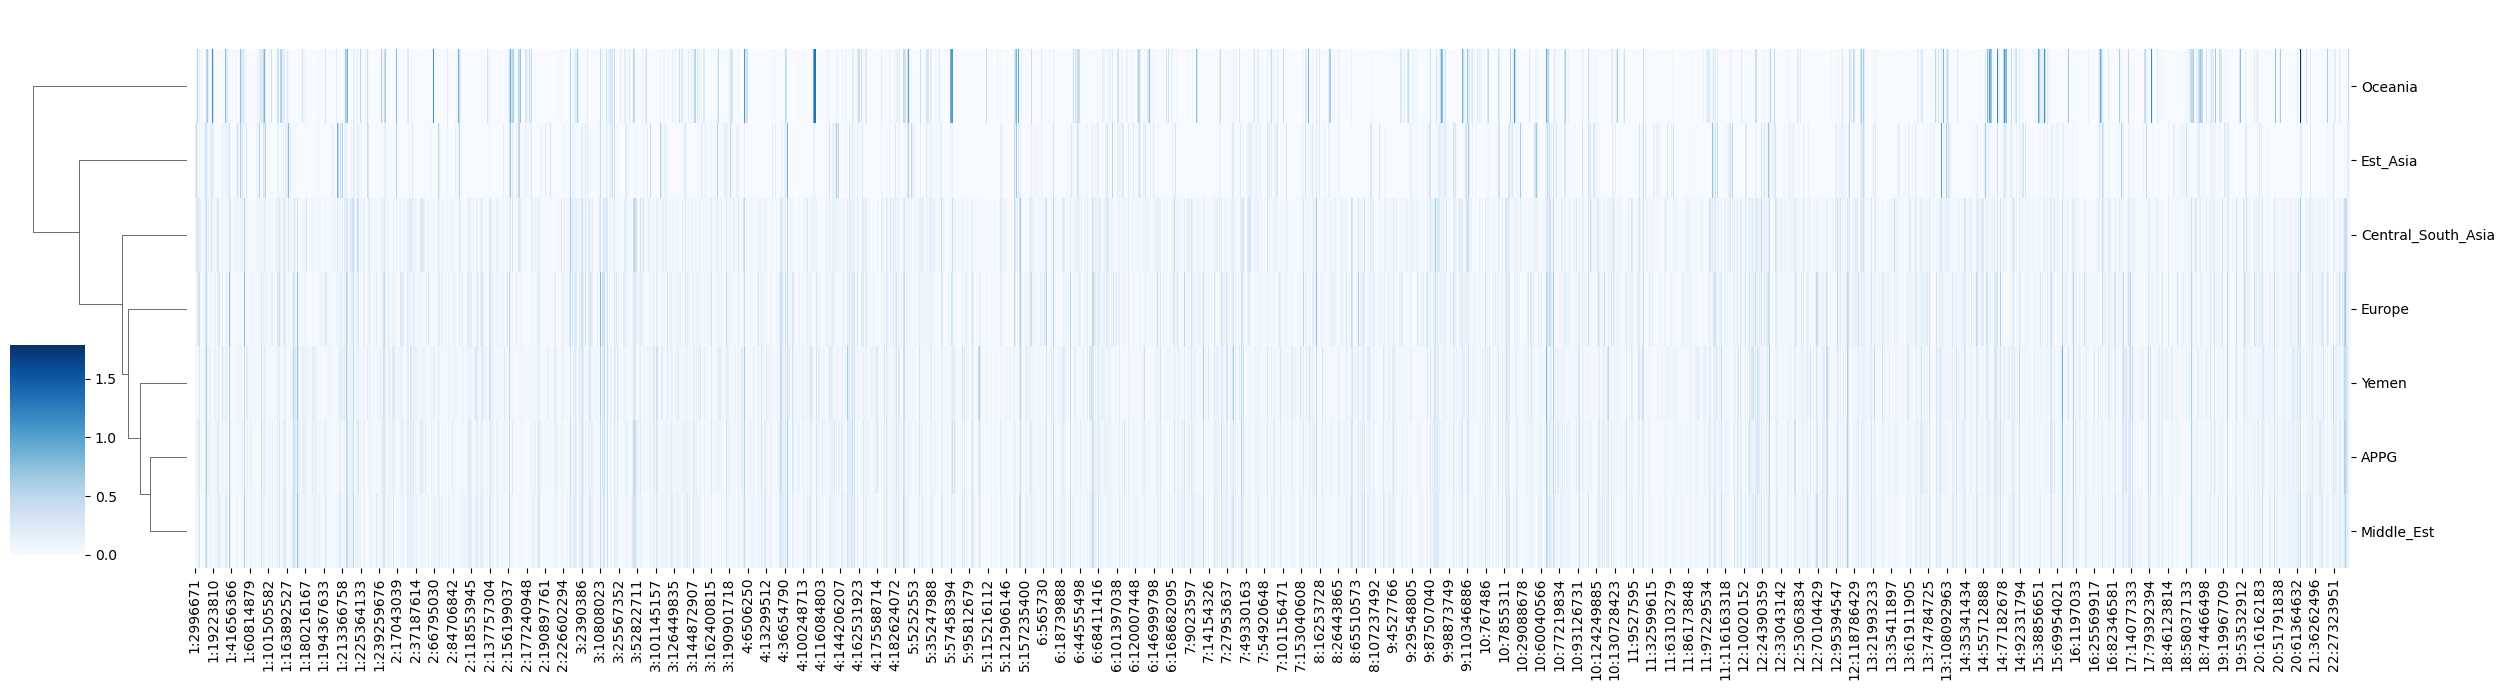

In [264]:
ax = sns.clustermap(stats.iloc[:,:-1].T, figsize=(25, 7), cmap="Blues", col_cluster=False, dendrogram_ratio=0.07, cbar_pos=(0, .2, .03, .3))

In [265]:
ax.savefig('neanderClustering2.svg')
ax.savefig('neanderClustering2.pdf')
ax.savefig('neanderClustering2.eps')

In [27]:
#import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 5]
stats = pd.DataFrame(stats0)
stats.T

0         1         2         3         4      \
Yemen               0.021739  0.021739  0.021739  0.021739  0.021739   
APPG                0.073171  0.073171  0.073171  0.073171  0.113821   
Middle_Est          0.105590  0.105590  0.105590  0.105590  0.204969   
Europe              0.264516  0.264516  0.264516  0.251613  0.380645   
Central_South_Asia  0.086294  0.086294  0.086294  0.086294  0.157360   
Est_Asia            0.367713  0.367713  0.367713  0.367713  0.327354   
Oceania             0.107143  0.107143  0.107143  0.107143  0.071429   
Africa              0.000000  0.000000  0.000000  0.000000  0.000000   

                       5         6         7         8         9      ...  \
Yemen               0.021739  0.021739  0.021739  0.108696  0.021739  ...   
APPG                0.113821  0.113821  0.113821  0.105691  0.016260  ...   
Middle_Est          0.204969  0.217391  0.217391  0.099379  0.000000  ...   
Europe              0.387097  0.277419  0.277419  0.051613  0.025806  ...   
Central_South_Asia  0.157360  0.045685  0.045685  0.238579  0.076142  ...   
Est_Asia            0.327354  0.062780  0.062780  0.116592  0.381166  ...   
Oceania             0.107143  0.071429  0.250000  0.000000  0.035714  ...   
Africa              0.000000  0.000000  0.000000  0.000000  0.000000  ...   

                       39047     39048     39049     39050     39051  \
Yemen               0.021739  0.021739  0.021739  0.021739  0.021739   
APPG                0.024390  0.024390  0.032520  0.032520  0.032520   
Middle_Est          0.006211  0.006211  0.006211  0.055901  0.055901   
Europe              0.064516  0.064516  0.064516  0.096774  0.096774   
Central_South_Asia  0.060914  0.060914  0.060914  0.055838  0.055838   
Est_Asia            0.008969  0.008969  0.008969  0.004484  0.004484   
Oceania             0.000000  0.000000  0.000000  0.071429  0.071429   
Africa              0.000000  0.000000  0.000000  0.000000  0.000000   

                       39052     39053     39054     39055     39056  
Yemen               0.021739  0.021739  0.021739  0.021739  0.021739  
APPG                0.032520  0.032520  0.040650  0.032520  0.040650  
Middle_Est          0.055901  0.055901  0.068323  0.055901  0.068323  
Europe              0.090323  0.096774  0.096774  0.096774  0.096774  
Central_South_Asia  0.055838  0.055838  0.076142  0.055838  0.076142  
Est_Asia            0.004484  0.004484  0.022422  0.004484  0.022422  
Oceania             0.071429  0.071429  0.071429  0.071429  0.071429  
Africa              0.000000  0.000000  0.201923  0.000000  0.201923  

[8 rows x 39057 columns]

In [234]:
nean2m = nean2.groupby('Population').mean()
nean2m

1:2996671  1:2998770  1:3001665  1:3002343  1:3020986  1:3024434  \
Population                                                                      
Aden          0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
Aljanad       0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
Azal          0.083333   0.083333   0.083333   0.083333   0.083333   0.083333   
Balochi       0.125000   0.125000   0.125000   0.125000   0.125000   0.125000   
Bedouin       0.130435   0.130435   0.130435   0.130435   0.195652   0.195652   
Druze         0.047619   0.047619   0.047619   0.047619   0.047619   0.047619   
French        0.285714   0.285714   0.285714   0.214286   0.392857   0.392857   
Hadramaut     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
Hudaydah      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
IRAQ          0.076923   0.076923   0.076923   0.076923   0.153846   0.153846   
Mozabite      0.185185   0.185185   0.185185   0.185185   0.518519   0.518519   
Palestinian   0.086957   0.086957   0.086957   0.086957   0.173913   0.173913   
SAUDI         0.071429   0.071429   0.071429   0.071429   0.107143   0.107143   
SYRIA         0.000000   0.000000   0.000000   0.000000   0.111111   0.111111   
Sheba         0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
UAE           0.102041   0.102041   0.102041   0.102041   0.122449   0.122449   
YEMEN         0.052632   0.052632   0.052632   0.052632   0.052632   0.052632   

             1:3089186  1:3091111  1:3224248  1:3292940  ...  22:50605815  \
Population                                               ...                
Aden          0.000000   0.000000   0.166667   0.000000  ...     0.000000   
Aljanad       0.000000   0.000000   0.000000   0.000000  ...     0.000000   
Azal          0.083333   0.083333   0.083333   0.083333  ...     0.000000   
Balochi       0.083333   0.083333   0.250000   0.041667  ...     0.041667   
Bedouin       0.130435   0.130435   0.108696   0.000000  ...     0.021739   
Druze         0.142857   0.142857   0.095238   0.000000  ...     0.000000   
French        0.214286   0.214286   0.035714   0.000000  ...     0.071429   
Hadramaut     0.000000   0.000000   0.750000   0.000000  ...     0.250000   
Hudaydah      0.000000   0.000000   0.000000   0.000000  ...     0.000000   
IRAQ          0.076923   0.076923   0.076923   0.000000  ...     0.000000   
Mozabite      0.296296   0.296296   0.000000   0.000000  ...     0.000000   
Palestinian   0.326087   0.326087   0.152174   0.000000  ...     0.000000   
SAUDI         0.107143   0.107143   0.107143   0.000000  ...     0.000000   
SYRIA         0.333333   0.333333   0.111111   0.000000  ...     0.111111   
Sheba         0.000000   0.000000   0.000000   0.000000  ...     0.000000   
UAE           0.102041   0.102041   0.163265   0.040816  ...     0.020408   
YEMEN         0.052632   0.052632   0.000000   0.000000  ...     0.052632   

             22:50609659  22:50610660  22:50642552  22:50642587  22:50643505  \
Population                                                                     
Aden            0.000000     0.000000     0.000000     0.000000     0.000000   
Aljanad         0.000000     0.000000     0.125000     0.125000     0.125000   
Azal            0.000000     0.000000     0.000000     0.000000     0.000000   
Balochi         0.041667     0.041667     0.125000     0.125000     0.125000   
Bedouin         0.021739     0.021739     0.108696     0.108696     0.108696   
Druze           0.000000     0.000000     0.000000     0.000000     0.000000   
French          0.071429     0.071429     0.071429     0.071429     0.071429   
Hadramaut       0.250000     0.250000     0.000000     0.000000     0.000000   
Hudaydah        0.000000     0.000000     0.000000     0.000000     0.000000   
IRAQ            0.000000     0.000000     0.000000     0.000000     0.000000   
Mozabite        0.000000     0.000000     0.07407

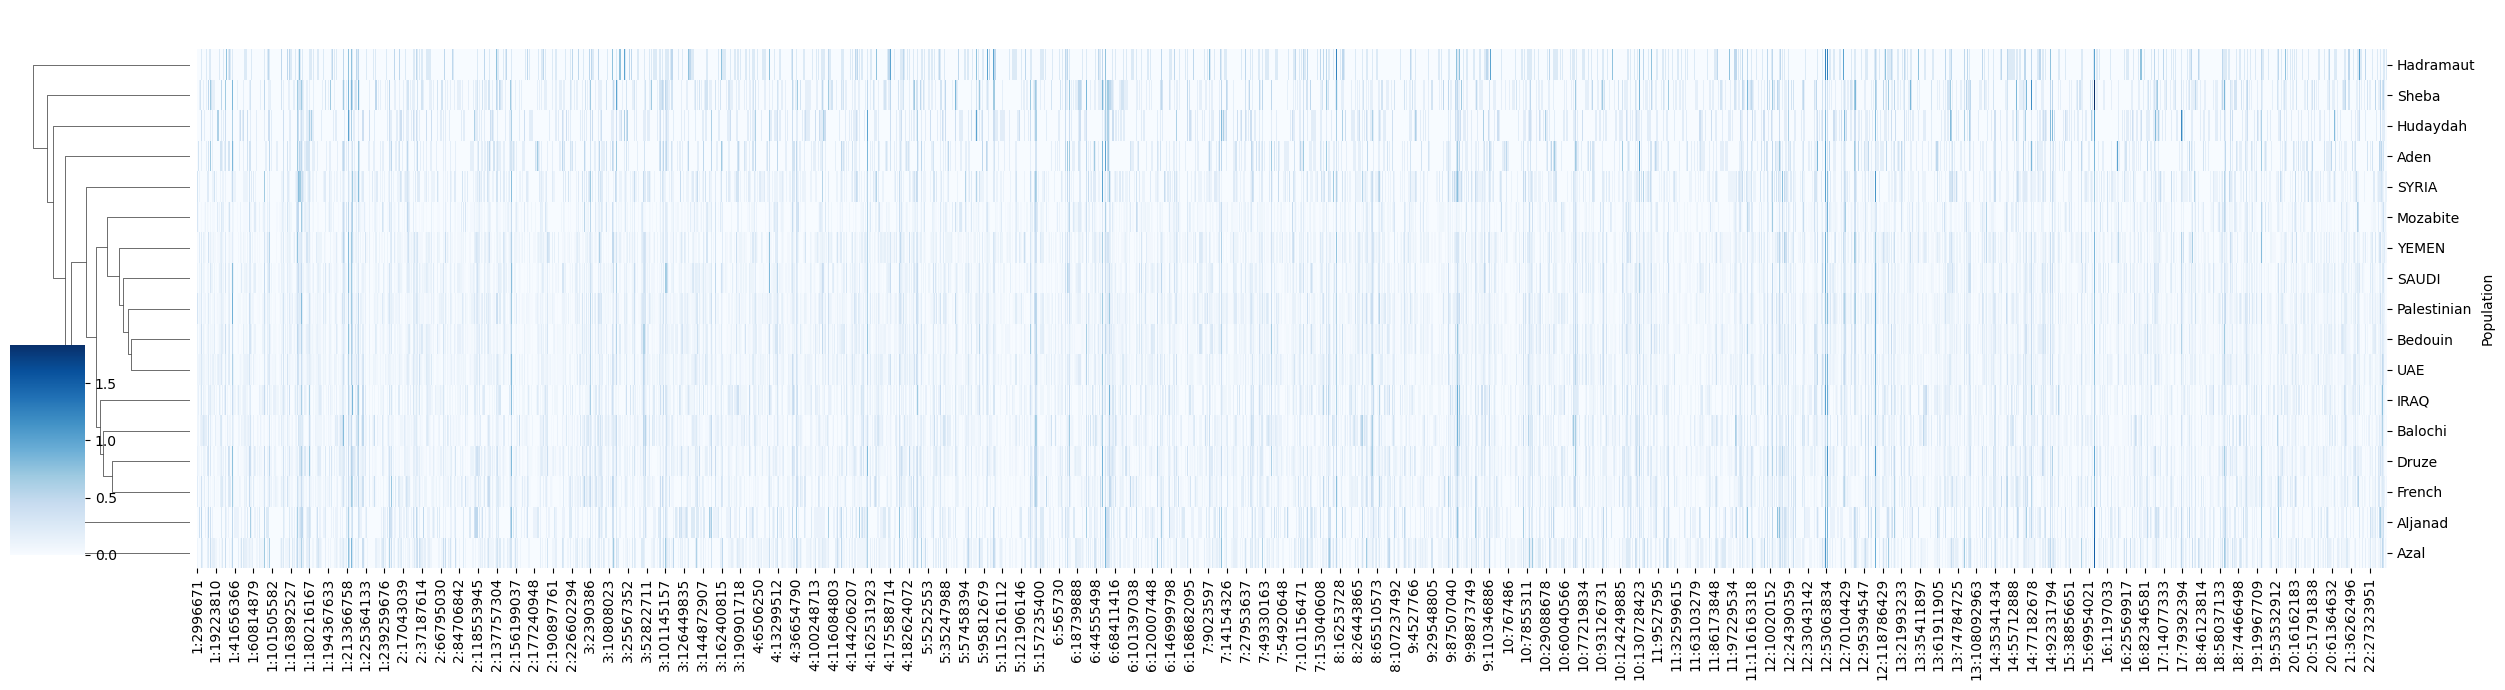

In [240]:
clustergrid = sns.clustermap(nean2m, figsize=(25, 7), method='complete', cmap="Blues", col_cluster=False, dendrogram_ratio=0.07, cbar_pos=(0, .2, .03, .3))
    

In [247]:
#ordering the af table as per dendrogram leaves, not that seems to make much sense
#list(nean2m.index)
#nean2m = nean2m.iloc[clustergrid.dendrogram_row.reordered_ind]
nean2m = nean2m.loc['Hadramaut Sheba Hudaydah Aden Aljanad Azal YEMEN SAUDI Palestinian Bedouin Druze UAE IRAQ SYRIA Mozabite Balochi French'.split()]

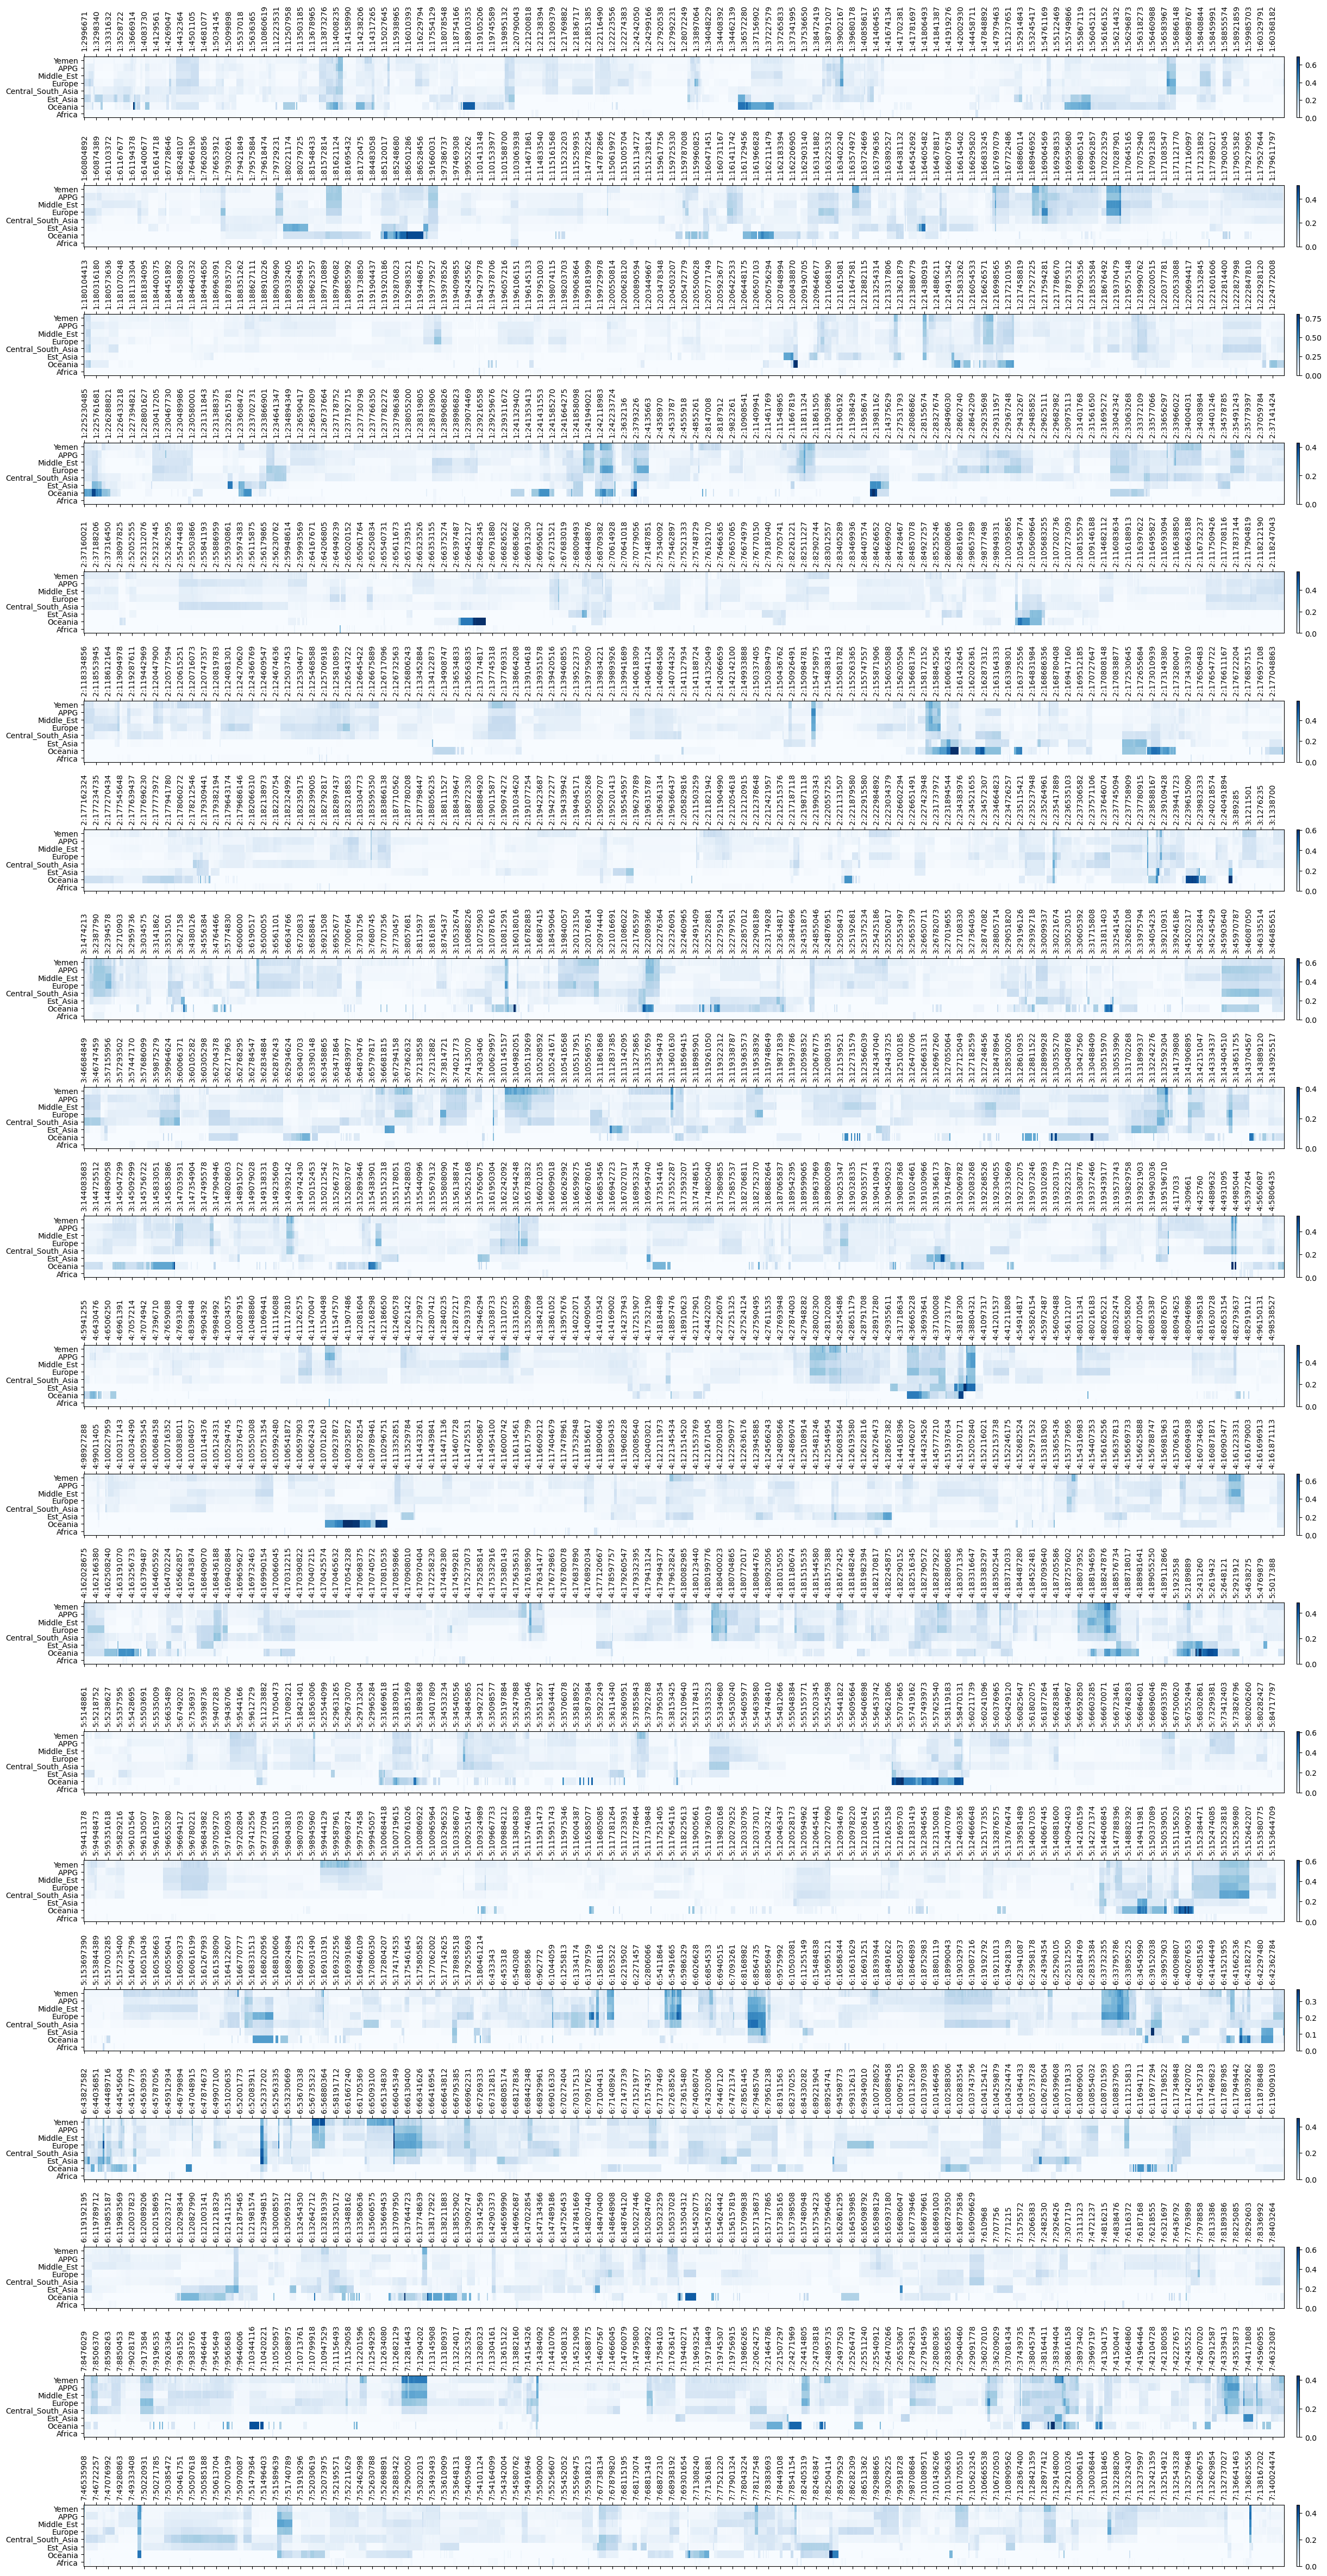

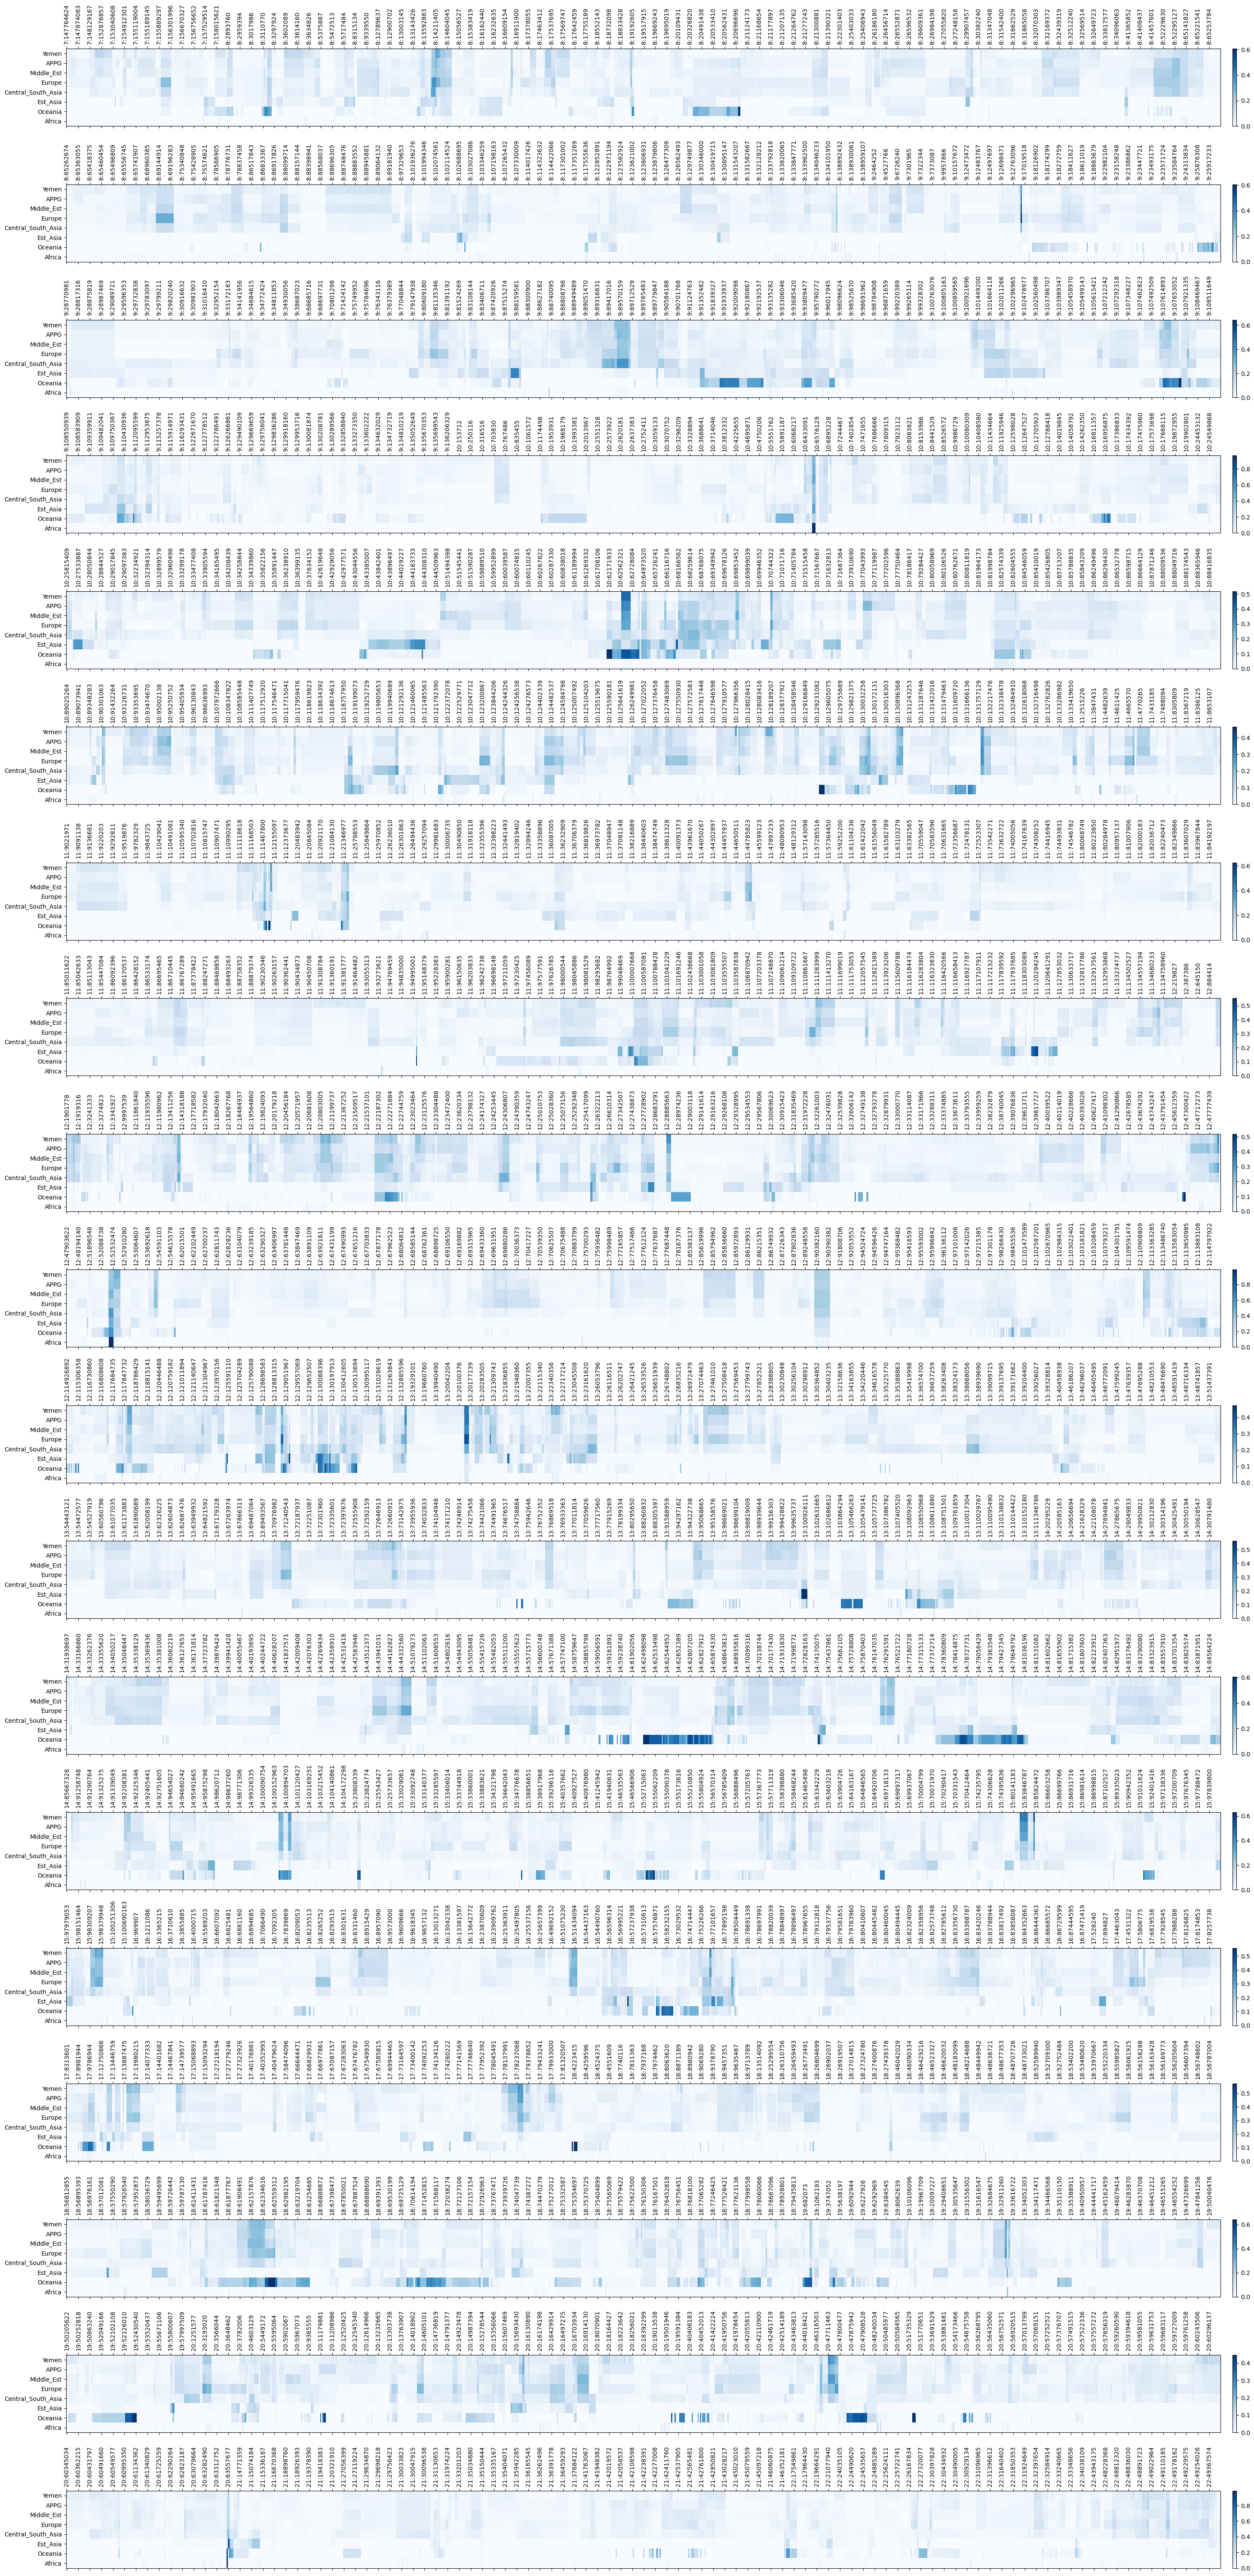

In [269]:
#a=nean2m.to_numpy().T/2 # 
a = stats.to_numpy()/2
regions=len(a)//1000
subplots = [(0,20), (20,39)]
for sub0, sub1 in subplots:
    subplotL = sub1 - sub0 
    fig, axs= plt.subplots(nrows=subplotL, figsize=(30,60))#,sharex=True)
    plt.subplots_adjust(hspace = 1.1)

    for i, region in enumerate(range(sub0, sub1)):
        ax = axs[i]
        #sns.clustermap(stats.T.iloc[:,region*1000:(region+1)*1000],ax=ax[region])
        start, end = region*1000, (region+1)*1000
        coords = nean.iloc[start:end, [0,-1]]
        
        im = ax.matshow(a[start:end,:].T, aspect='auto', cmap='Blues')#, vmin=0, vmax=2)
        ax.set_yticks(range(len(regionNames)), regionNames)
        districtNames = nean2m
        pops = list(nean2m.index)
        #ax.set_yticks(range(len(pops)), pops)
        ticks = [(i, f'{chrom}:{pos}') for i, (pos, chrom) in enumerate(nean.iloc[start:end,[0,-1]].to_numpy()) if i%10==0]
        ticks, labels = list(zip(*ticks))
        
        ax.set_xticks(ticks, labels, rotation=90)
        ax.title.set_visible(False)

        fig.colorbar(im, ax=ax, pad=0.01, fraction=0.04)
        #if region==3: break
    fig.savefig(f'neanderPlot_regions_{sub0}.pdf')

plt.tight_layout()

In [230]:
a.shape

(17, 39057)

In [227]:
fig.savefig

In [81]:
import numpy as np

def ranges(a, target=0):
    inrange = False
    start = None
    for pos, el in enumerate(a):
        if el==target: 
            if not inrange:
                start = pos
            inrange = True
        else:
            if inrange: yield (start, pos)
            inrange = False
    if inrange: yield (start, pos+1)


(0, 4) [0 0 0 0]
(7, 12) [0 0 0 0 0]
(15, 20) [0 0 0 0 0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [103]:
stats.shape

(39057, 8)

In [100]:
def slidingWindow(size=3,maxSize=10):
    for i in range(maxSize-size):
        yield (i, i+size)

wsize = 20
highest = [a[w1:w2].mean(axis=0).argmax() for w1,w2 in slidingWindow(size=20, maxSize=a.shape[0])]
highest = [None]*(wsize//2) + highest + [None]*(wsize//2)

for r0, r1 in ranges(highest, target=0):
    meanYemen = a[r0:r1,0].mean()
    if r1-r0>20: 
        print(r0, r1, meanYemen)
    
#dfa = pd.DataFrame(a)
#dfa['highest'] = highest
#dfa[dfa.highest==0]


360 384 0.13315217391304346
949 976 0.15217391304347827
1078 1108 0.05362318840579709
1748 1769 0.21428571428571427
1825 1847 0.2430830039525692
1873 1897 0.20471014492753623
1940 1974 0.15281329923273657
2034 2093 0.0821665438467207
2141 2166 0.14695652173913046
2466 2492 0.08361204013377926
2689 2718 0.2781109445277361
3175 3199 0.13949275362318841
3224 3255 0.06732117812061714
3506 3539 0.14031620553359683
3598 3649 0.17263427109974425
3909 3934 0.25565217391304346
3981 4012 0.1276297335203366
4016 4048 0.08763586956521739
4348 4380 0.07404891304347827
4599 4628 0.1521739130434782
4738 4759 0.11904761904761907
5058 5112 0.1964573268921095
5230 5267 0.14159811985898943
5335 5373 0.24542334096109839
6373 6416 0.11425682507583419
6467 6501 0.04092071611253197
6507 6551 0.15415019762845852
6652 6685 0.16534914361001318
7238 7275 0.07109283196239718
7604 7631 0.17954911433172305
8252 8279 0.2222222222222222
8308 8332 0.1802536231884058
8342 8409 0.24399740428293318
8460 8501 0.1977730646

In [99]:
a[r0:r1,6].mean()

0.03214285714285714

In [ ]:
er

In [300]:
fig.savefig('afChromPaint6regions.svg')

In [36]:
len(stats0)

8

In [268]:
pd.DataFrame(sumstats)

0         1         2
0               Yemen  0.038359  0.003511
1                APPG  0.037129  0.003610
2          Middle_Est  0.036171  0.005633
3              Europe  0.039245  0.002368
4  Central_South_Asia  0.035613  0.003790
5            Est_Asia  0.022315  0.001849
6             Oceania  0.029669  0.001820
7              Africa  0.001868  0.001252

In [ ]:
neander = 'EUR-ASN'
nean = pd.read_csv(f"../Neanderthal/neanderPandas_{neander}.csv.gz")

In [ ]:
nean = nean.set_index('Pos')

In [25]:
neanSNPsum = nean.iloc[:,:-1].sum(axis=0)

for id, count in sorted(neanSNPsum.items(), key=lambda x:x[1]):
    print('%-30s: %6s' % (id, int(count)))

Africa_00932                  :     33
Africa_00939                  :     37
Africa_00940                  :     39
Africa_00927                  :     45
Africa_00935                  :     46
Africa_00930                  :     46
Africa_00933                  :     49
Africa_00924                  :     49
Africa_00941                  :     50
Africa_00931                  :     50
Africa_00920                  :     52
Africa_00934                  :     55
Africa_00936                  :     56
Africa_00937                  :     57
Africa_00929                  :     61
Africa_00925                  :     63
Africa_00944                  :     64
Africa_00938                  :     65
Africa_00926                  :     67
Africa_00908                  :     74
Africa_00913                  :     80
Africa_01035                  :     80
Africa_00943                  :     82
Africa_00942                  :     85
Africa_01284                  :     92
Africa_01028             

In [20]:
nean

YemenLahij_1456627  YemenAmran_1456593  YemenHudayda_1456774  \
Pos                                                                      
2996671                  0.0                 0.0                   0.0   
2998770                  0.0                 0.0                   0.0   
3001665                  0.0                 0.0                   0.0   
3002343                  0.0                 0.0                   0.0   
3020986                  0.0                 0.0                   0.0   
...                      ...                 ...                   ...   
50643505                 0.0                 0.0                   0.0   
50653781                 0.0                 0.0                   0.0   
50654517                 0.0                 0.0                   0.0   
50656064                 0.0                 0.0                   0.0   
50656881                 0.0                 0.0                   0.0   

          YemenMahwit_1456680  YemenMahwit_1456573  YemenDhamar_1456564  \
Pos                                                                       
2996671                   0.0                  0.0                  0.0   
2998770                   0.0                  0.0                  0.0   
3001665                   0.0                  0.0                  0.0   
3002343                   0.0                  0.0                  0.0   
3020986                   0.0                  0.0                  0.0   
...                       ...                  ...                  ...   
50643505                  0.0                  0.0                  0.0   
50653781                  0.0                  0.0                  0.0   
50654517                  0.0                  0.0                  0.0   
50656064                  0.0                  0.0                  0.0   
50656881                  0.0                  0.0                  0.0   

          YemenHudayda_1456765  YemenHadramout_1456602  YemenSaada_1456705  \
Pos                                                                          
2996671                    0.0                     0.0                 0.0   
2998770                    0.0                     0.0                 0.0   
3001665                    0.0                     0.0                 0.0   
3002343                    0.0                     0.0                 0.0   
3020986                    0.0                     0.0                 0.0   
...                        ...                     ...                 ...   
50643505                   0.0                     0.0                 0.0   
50653781                   0.0                     0.0                 0.0   
50654517                   0.0                     0.0                 0.0   
50656064                   0.0                     0.0                 0.0   
50656881                   0.0                     0.0                 0.0   

          YemenAbyan_1456614  ...  APPG7623343  GRCh38.10  APPG7623345  \
Pos                           ...                                        
2996671                  0.0  ...          0.0        0.0          0.0   
2998770                  0.0  ...          0.0        0.0          0.0   
3001665                  0.0  ...          0.0        0.0          0.0   
3002343                  0.0  ...          0.0        0.0          0.0   
3020986                  0.0  ...          0.0        0.0          0.0   
...                      ...  ...          ...        ...          ...   
50643505                 0.0  ...          0.0        0.0          0.0   
50653781                 0.0  ...          0.0        0.0          0.0   
50654517                 0.0  ...          0.0        0.0          0.0   
50656064                 0.0  ...          0.0        0.0          0.0   
50656881                 0.0  ...          0.0        0.0          0.0   

          GRCh38.11  APPG7623347  APPG7623348  GRCh38.12  APPG7623350  \
Pos                 

In [35]:
nean.max()

YemenLahij_1456627      2.0
YemenAmran_1456593      2.0
YemenHudayda_1456774    2.0
YemenMahwit_1456680     2.0
YemenMahwit_1456573     2.0
                       ... 
APPG7623347             2.0
APPG7623348             2.0
GRCh38.12               2.0
APPG7623350             2.0
APPG7623351             2.0
Length: 1112, dtype: float64

In [33]:
colsel[:10]

['Africa_01201',
 'Africa_00479',
 'Africa_01408',
 'Africa_00471',
 'Africa_01411',
 'Africa_00937',
 'Africa_01094',
 'Africa_00469',
 'Africa_00475',
 'Africa_00473']

In [38]:
pop2idMap

{'Yemen': ['YemenLahij_1456627', 'YemenAmran_1456593', 'YemenHudayda_1456774', 'YemenMahwit_1456680', 'YemenMahwit_1456573', 'YemenDhamar_1456564', 'YemenHudayda_1456765', 'YemenHadramout_1456602', 'YemenSaada_1456705', 'YemenAbyan_1456614', 'YemenSaada_1456660', 'YemenAmran_1456663', 'YemenTaizz_1456737', 'YemenIbb_1456568', 'YemenMahwit_1456622', 'YemenMahwit_1456650', 'YemenTaizz_1456743', 'YemenBayda_1456603', 'YemenAbyan_1456674', 'YemenMaarib_1456634', 'YemenTaizz_1456748', 'YemenHadramout_1456613', 'YemenAbyan_1456688', 'YemenHudayda_1456561', 'YemenIbb_1456560', 'YemenBayda_1456617', 'YemenIbb_1456637', 'YemenEGAN00001456590', 'YemenHadramout_1456629', 'YemenMaarib_1456675', 'YemenMaarib_1456690', 'YemenMaarib_1456620', 'YemenHudayda_1456745', 'YemenDhamar_1456684', 'YemenAmran_1456648', 'YemenAbyan_1456628', 'YemenSaada_1456676', 'YemenIbb_1456592', 'YemenDhamar_1455435', 'YemenLahij_1456657', 'YemenAmran_1456579', 'YemenSaada_1456615', 'YemenTaizz_1456732', 'YemenDhamar_14566

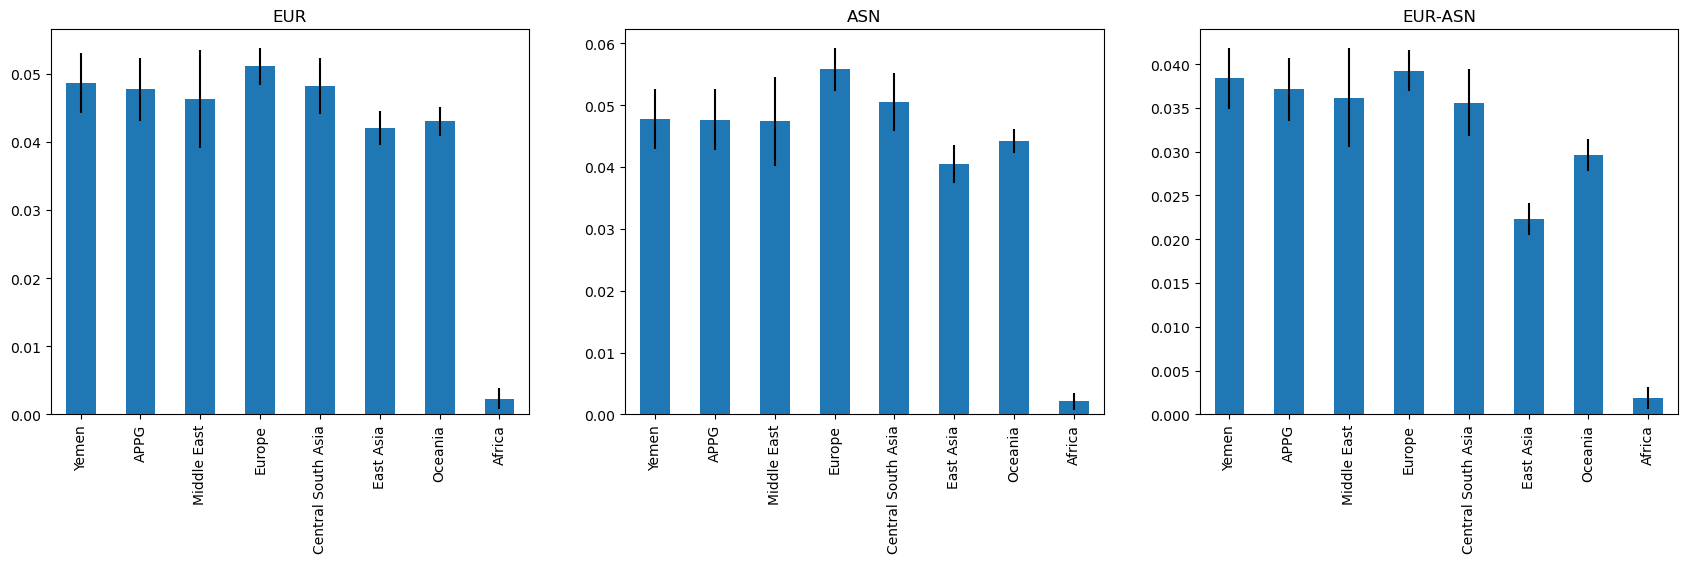

In [45]:
def prettify(pop):
    pop = pop.replace('_', ' ')
    pop = pop.replace('Est', 'East')
    return pop
#prettyName = {'EUR': 'European', 'ASN': 'Asian', ''}

plt.rcParams['figure.figsize'] = [21, 5]
datadir = '/mnt/Drive1/ahenschel/SambaShare/YemenGenomeAnalysis/Neanderthal'
normfact={'EUR':94239,'ASN':75339,'EUR-ASN': 97365} ## derived from the nderived.snp files
fig,ax=plt.subplots(ncols=3)
for i, neander in enumerate('EUR ASN EUR-ASN'.split()):
    nean = pd.read_csv(f"{datadir}/neanderPandas_{neander}.csv.gz")
    nean = nean.set_index(['Chrom', 'Pos'])
    sumstats=[]
    for pop in 'Yemen APPG Middle_Est Europe Central_South_Asia Est_Asia Oceania Africa'.split():
        colsel = [col for col in nean.columns.values if col.startswith(sel)]    
        colsel = pop2idMap[pop]
        popsum = nean[colsel].sum(axis=0)
        popmeans = popsum/normfact[neander]
        sumstats.append((pop, popmeans.mean(), popmeans.std()))
    stats=pd.DataFrame(sumstats)
    stats[0] = [prettify(pop) for pop in stats[0]]        
    stats.set_index(0, inplace=True)
    stats[1].plot.bar(yerr=stats[2], ax=ax[i])
    ax[i].set_title(neander)
    ax[i].set_xlabel('')

In [47]:
fig.savefig('neanderPct.svg')

<AxesSubplot:xlabel='0'>

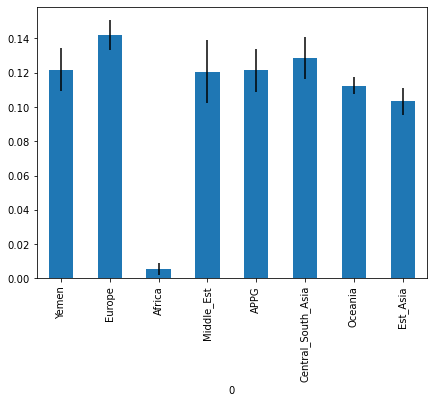

In [156]:
sumstats=[]
for sel in 'Yemen Europe Africa Middle_Est APPG Central_South_Asia Oceania Est_Asia'.split():
    colsel = [col for col in nean.columns.values if col.startswith(sel)]    
    popmeans = nean[colsel].mean(axis=0)
    sumstats.append((sel, popmeans.mean(), popmeans.std()))
stats=pd.DataFrame(sumstats).set_index(0)
plt.rcParams['figure.figsize'] = [7, 5]
stats[1].plot.bar(yerr=stats[2])

In [143]:
    
    
#nean[colsel]
"""
Asian Neanderthal Snps:

Yemen 0.12167531291172597 0.012517421178151215
Europe 0.1421327328585393 0.008889704297279059
Africa 0.005390117694805195 0.0035835599701155955
Middle_Est 0.12072162115834476 0.018229662797895056
APPG 0.12139992037095697 0.012499395032985338
Central_South_Asia 0.12865379914079153 0.012015252747578087
Oceania 0.11252150007730366 0.005053770964035509
Est_Asia 0.10322394347058024 0.007760813865078479


European Neanderthal Snps:

Yemen 0.09763280698143954 0.00887047722905565
Europe 0.10266430621983244 0.00548285455738297
Africa 0.004681406074203823 0.003147713891120138
Middle_Est 0.0931355216413979 0.014426235477351066
APPG 0.09585702483607925 0.0093135456274504
Central_South_Asia 0.09685569673627718 0.008229037503099982
Oceania 0.08642107860158263 0.0042657186932681
Est_Asia 0.08449179311580506 0.0050999701959829865
"""

Yemen 0.09763280698143954 0.00887047722905565
Europe 0.10266430621983244 0.00548285455738297
Africa 0.004681406074203823 0.003147713891120138
Middle_Est 0.0931355216413979 0.014426235477351066
APPG 0.09585702483607925 0.0093135456274504
Central_South_Asia 0.09685569673627718 0.008229037503099982
Oceania 0.08642107860158263 0.0042657186932681
Est_Asia 0.08449179311580506 0.0050999701959829865


'\nAsian Neanderthal Snps:\n\nYemen 0.12167531291172597 0.012517421178151215\nEurope 0.1421327328585393 0.008889704297279059\nAfrica 0.005390117694805195 0.0035835599701155955\nMiddle_Est 0.12072162115834476 0.018229662797895056\nAPPG 0.12139992037095697 0.012499395032985338\nCentral_South_Asia 0.12865379914079153 0.012015252747578087\nOceania 0.11252150007730366 0.005053770964035509\nEst_Asia 0.10322394347058024 0.007760813865078479\n\n'

In [140]:
nean[colsel].mean(axis=0)

YemenLahij_1456627        0.120671
YemenAmran_1456593        0.135992
YemenHudayda_1456774      0.110593
YemenMahwit_1456680       0.121314
YemenMahwit_1456573       0.123072
YemenDhamar_1456564       0.146814
YemenHudayda_1456765      0.115463
YemenHadramout_1456602    0.117864
YemenSaada_1456705        0.132846
YemenAbyan_1456614        0.112858
YemenSaada_1456660        0.127976
YemenAmran_1456663        0.129430
YemenTaizz_1456737        0.124019
YemenIbb_1456568          0.113738
YemenMahwit_1456622       0.130919
YemenMahwit_1456650       0.130817
YemenTaizz_1456743        0.109476
YemenBayda_1456603        0.126995
YemenAbyan_1456674        0.107312
YemenMaarib_1456634       0.132610
YemenTaizz_1456748        0.119927
YemenHadramout_1456613    0.093885
YemenAbyan_1456688        0.105993
YemenHudayda_1456561      0.118405
YemenIbb_1456560          0.138393
YemenBayda_1456617        0.100176
YemenIbb_1456637          0.127942
YemenEGAN00001456590      0.124932
YemenHadramout_14566

Created heatmap_Europe_chr22.svg
Created heatmap_Africa_chr22.svg
Created heatmap_Yemen_chr22.svg
Created heatmap_Middle_Est_chr22.svg
Created heatmap_APPG_chr22.svg
Created heatmap_Central_South_Asia_chr22.svg
Created heatmap_Oceania_chr22.svg
Created heatmap_Est_Asia_chr22.svg


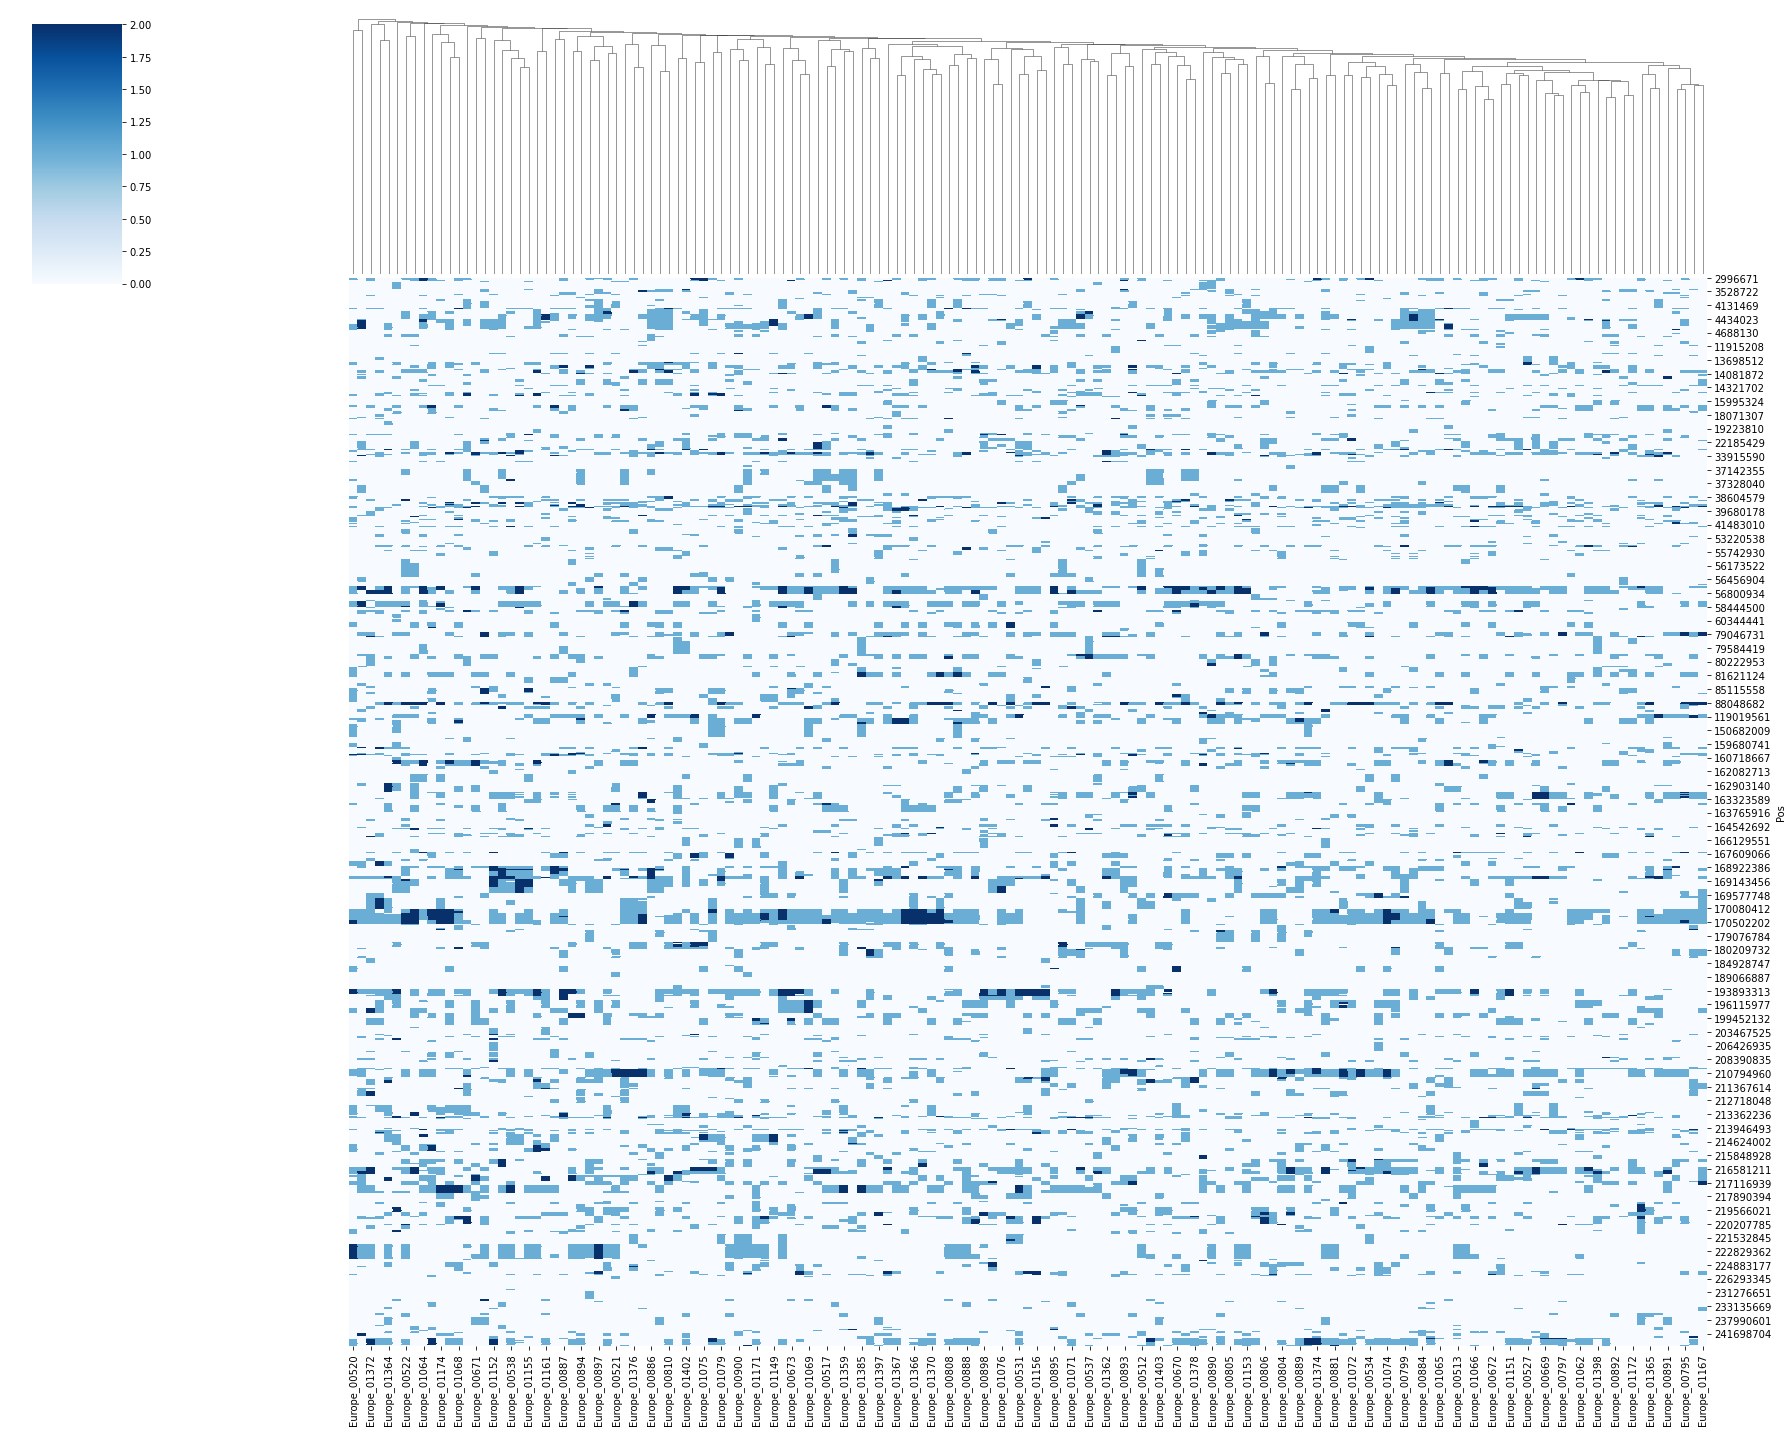

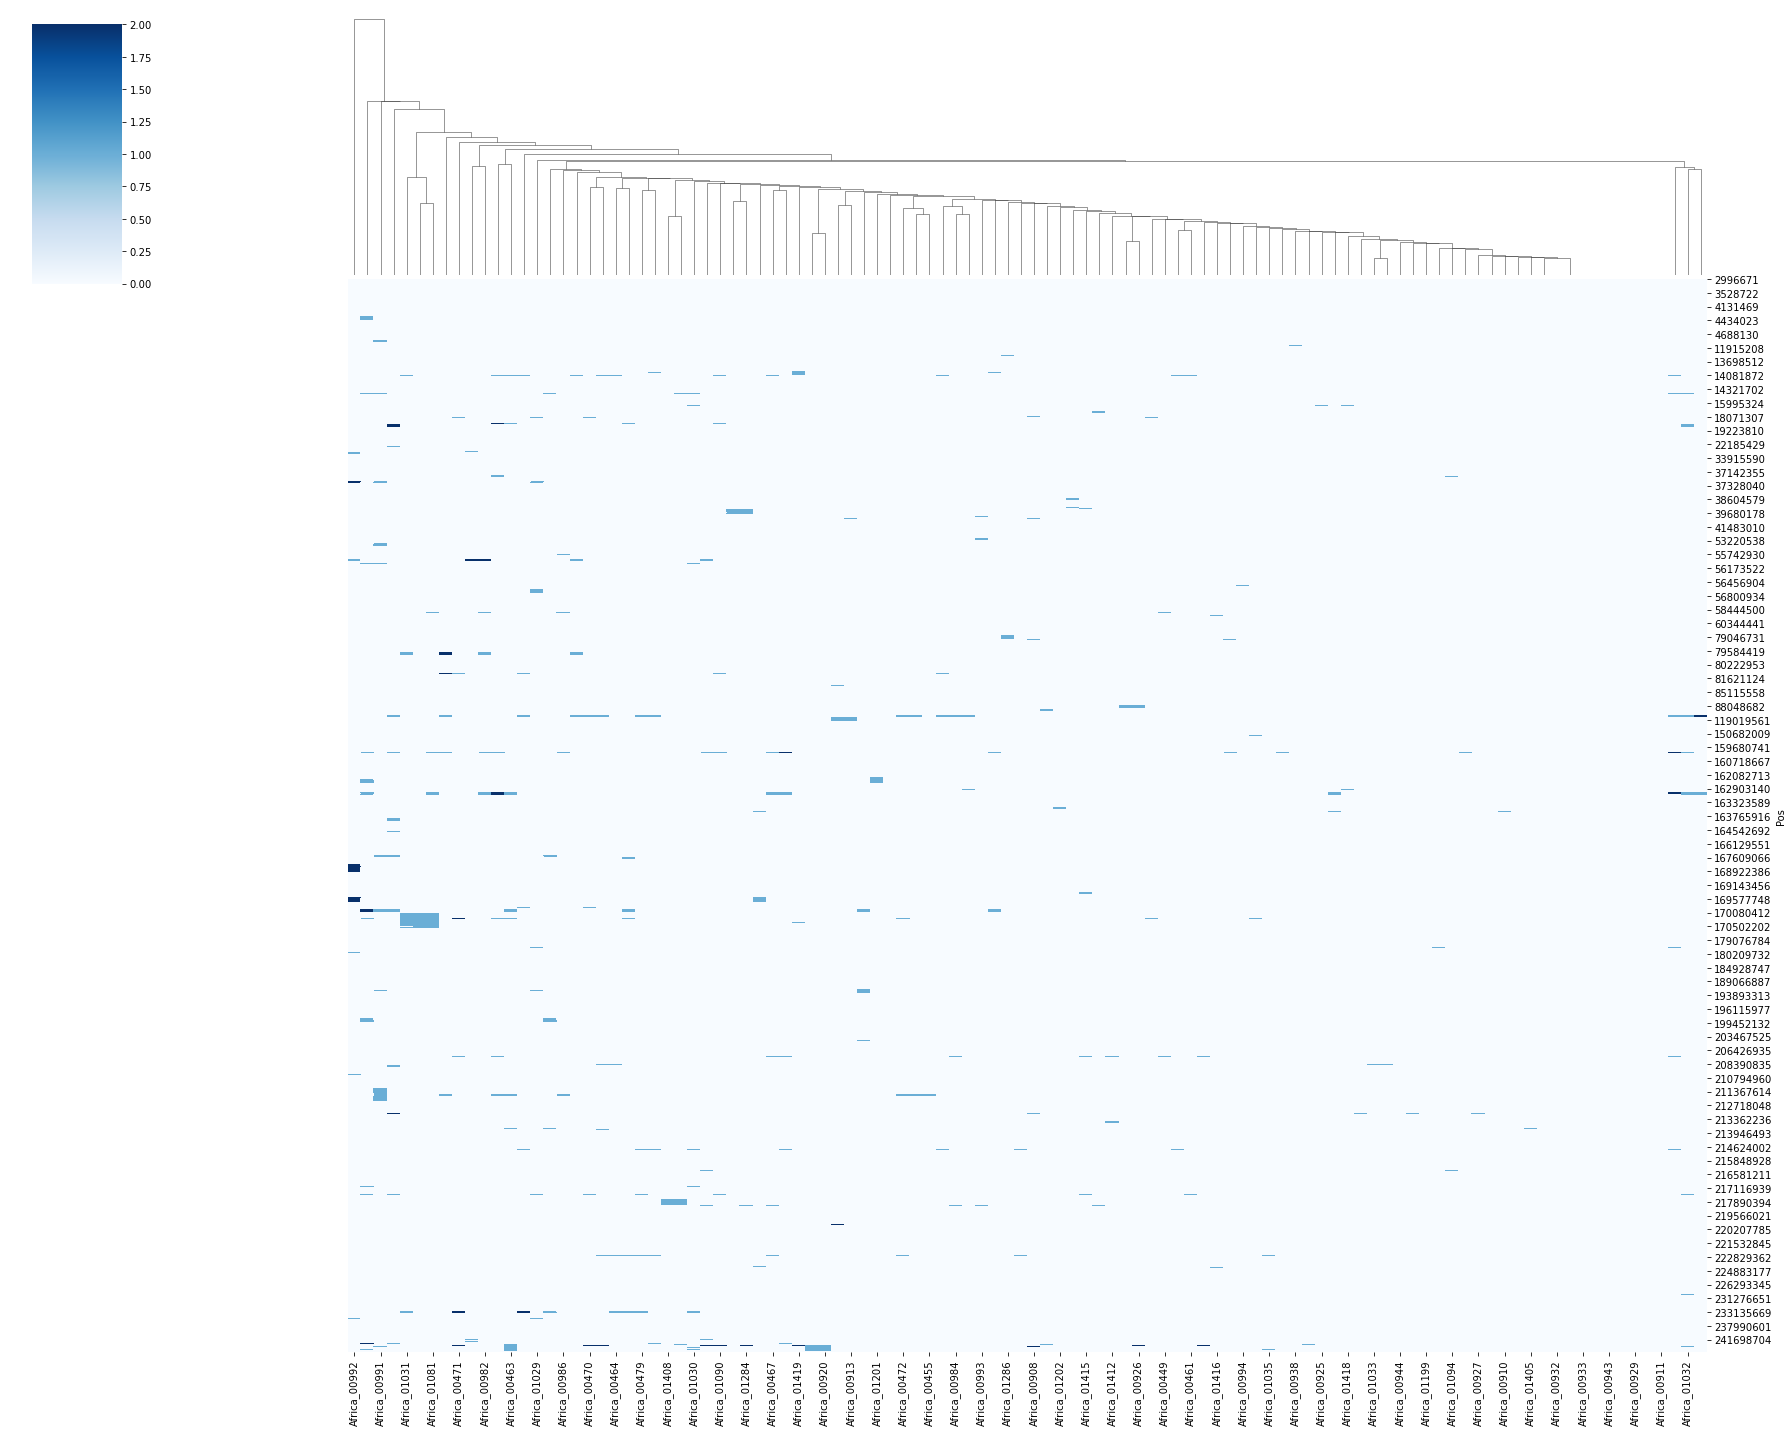

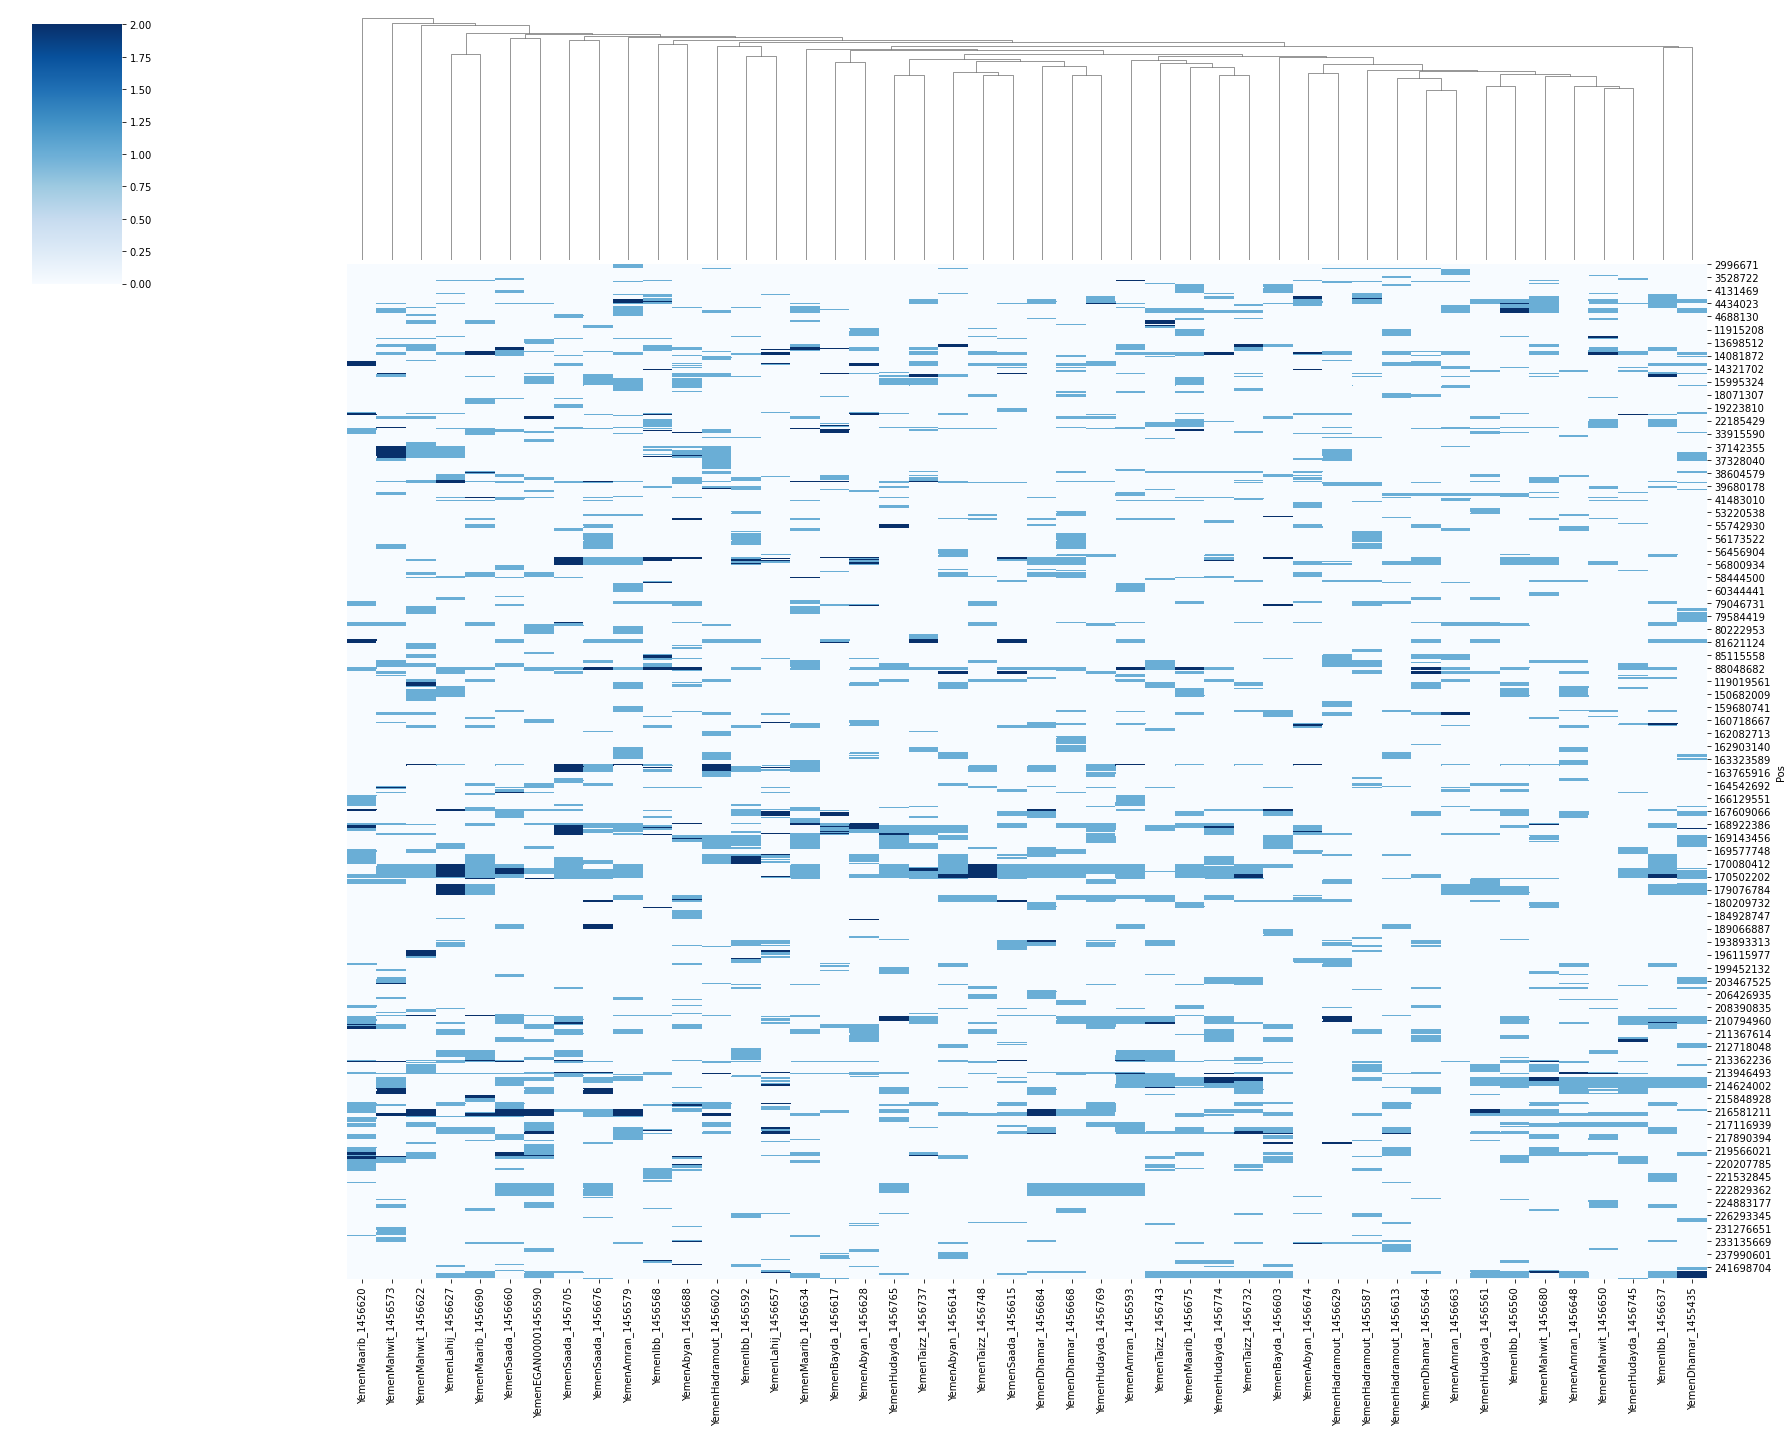

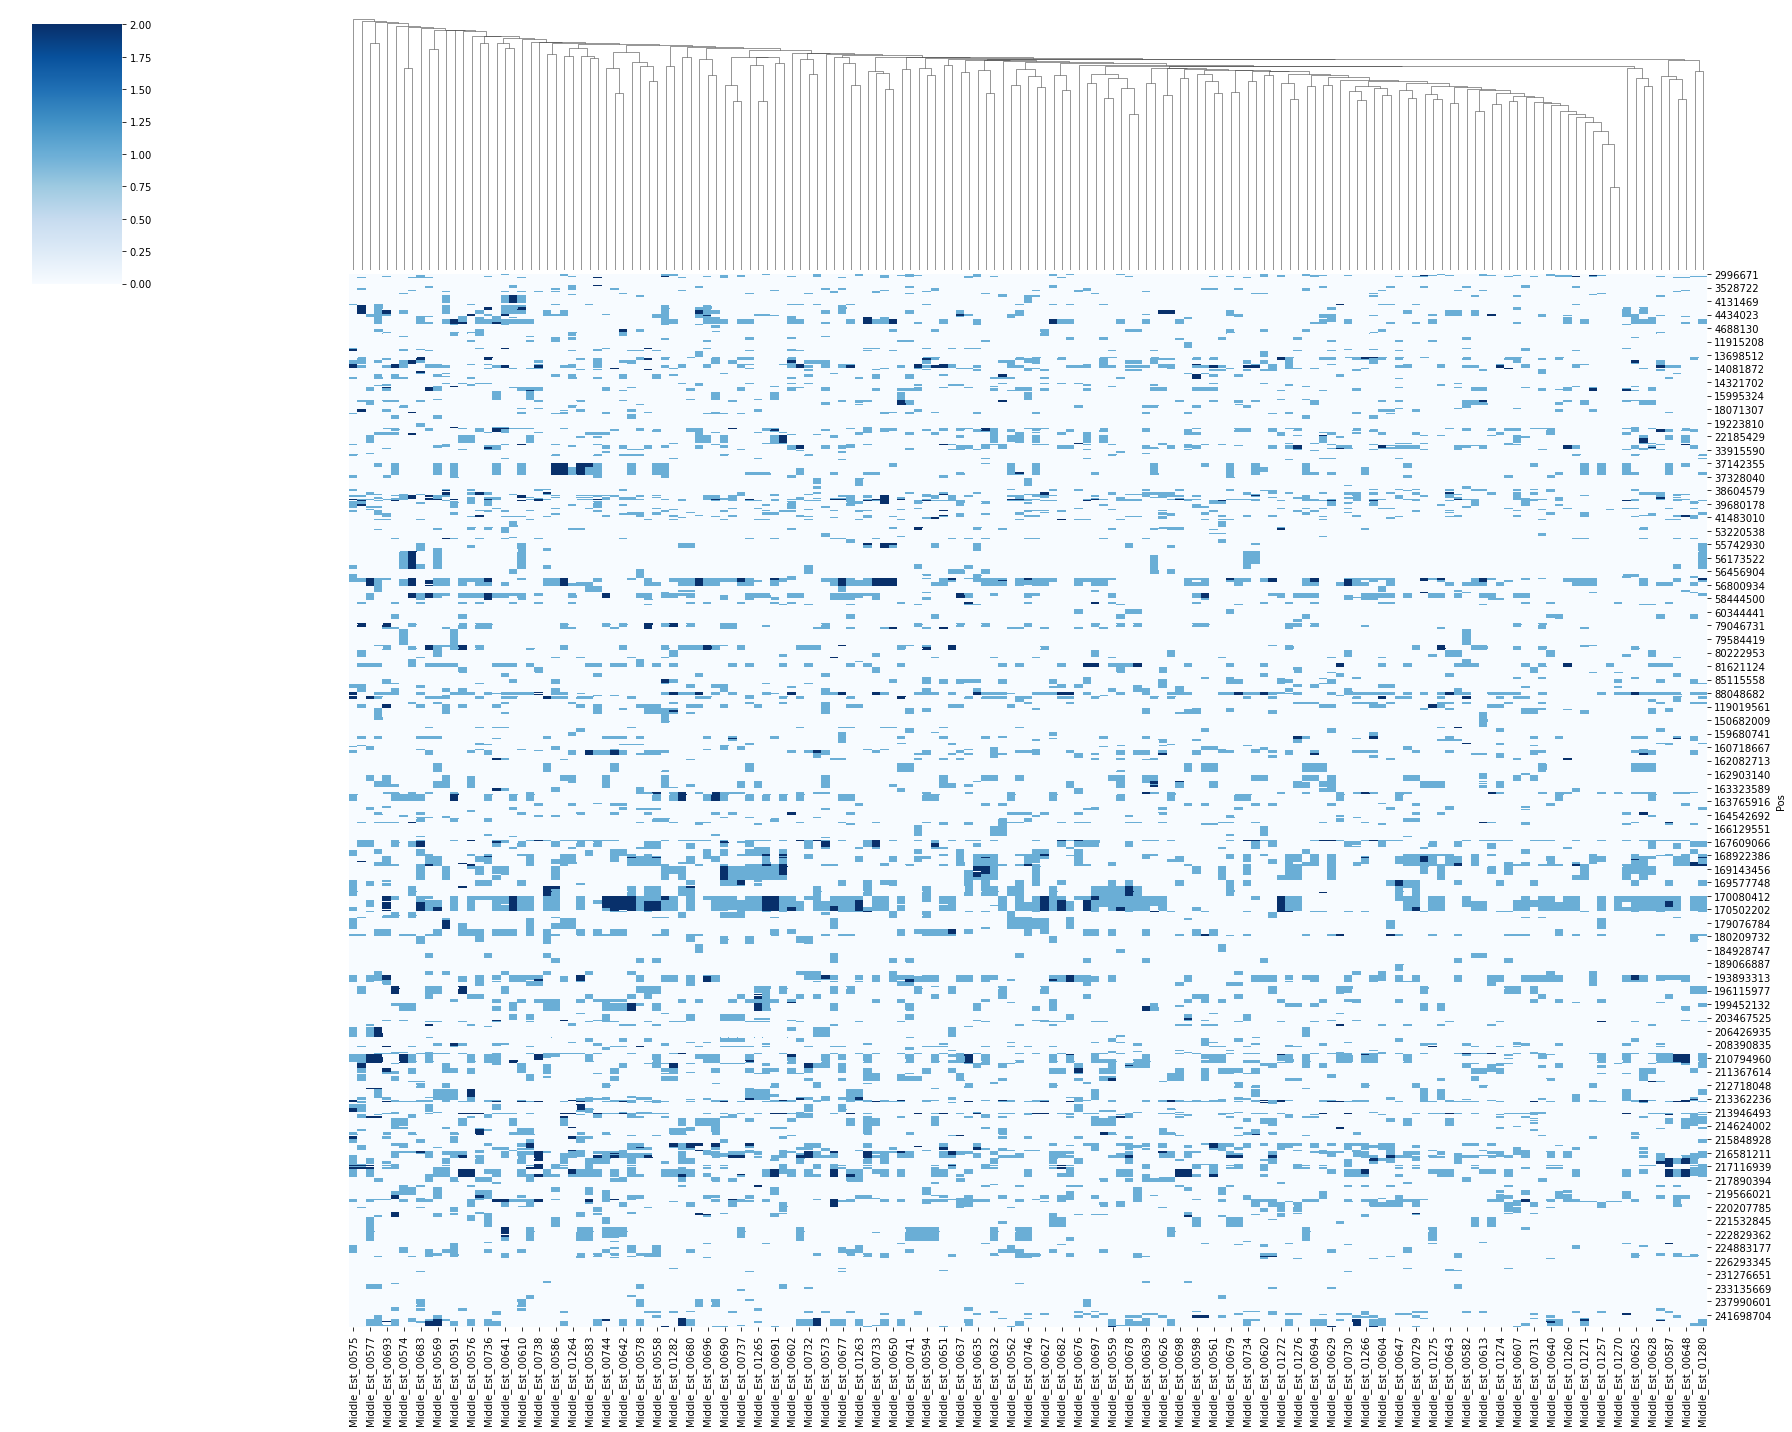

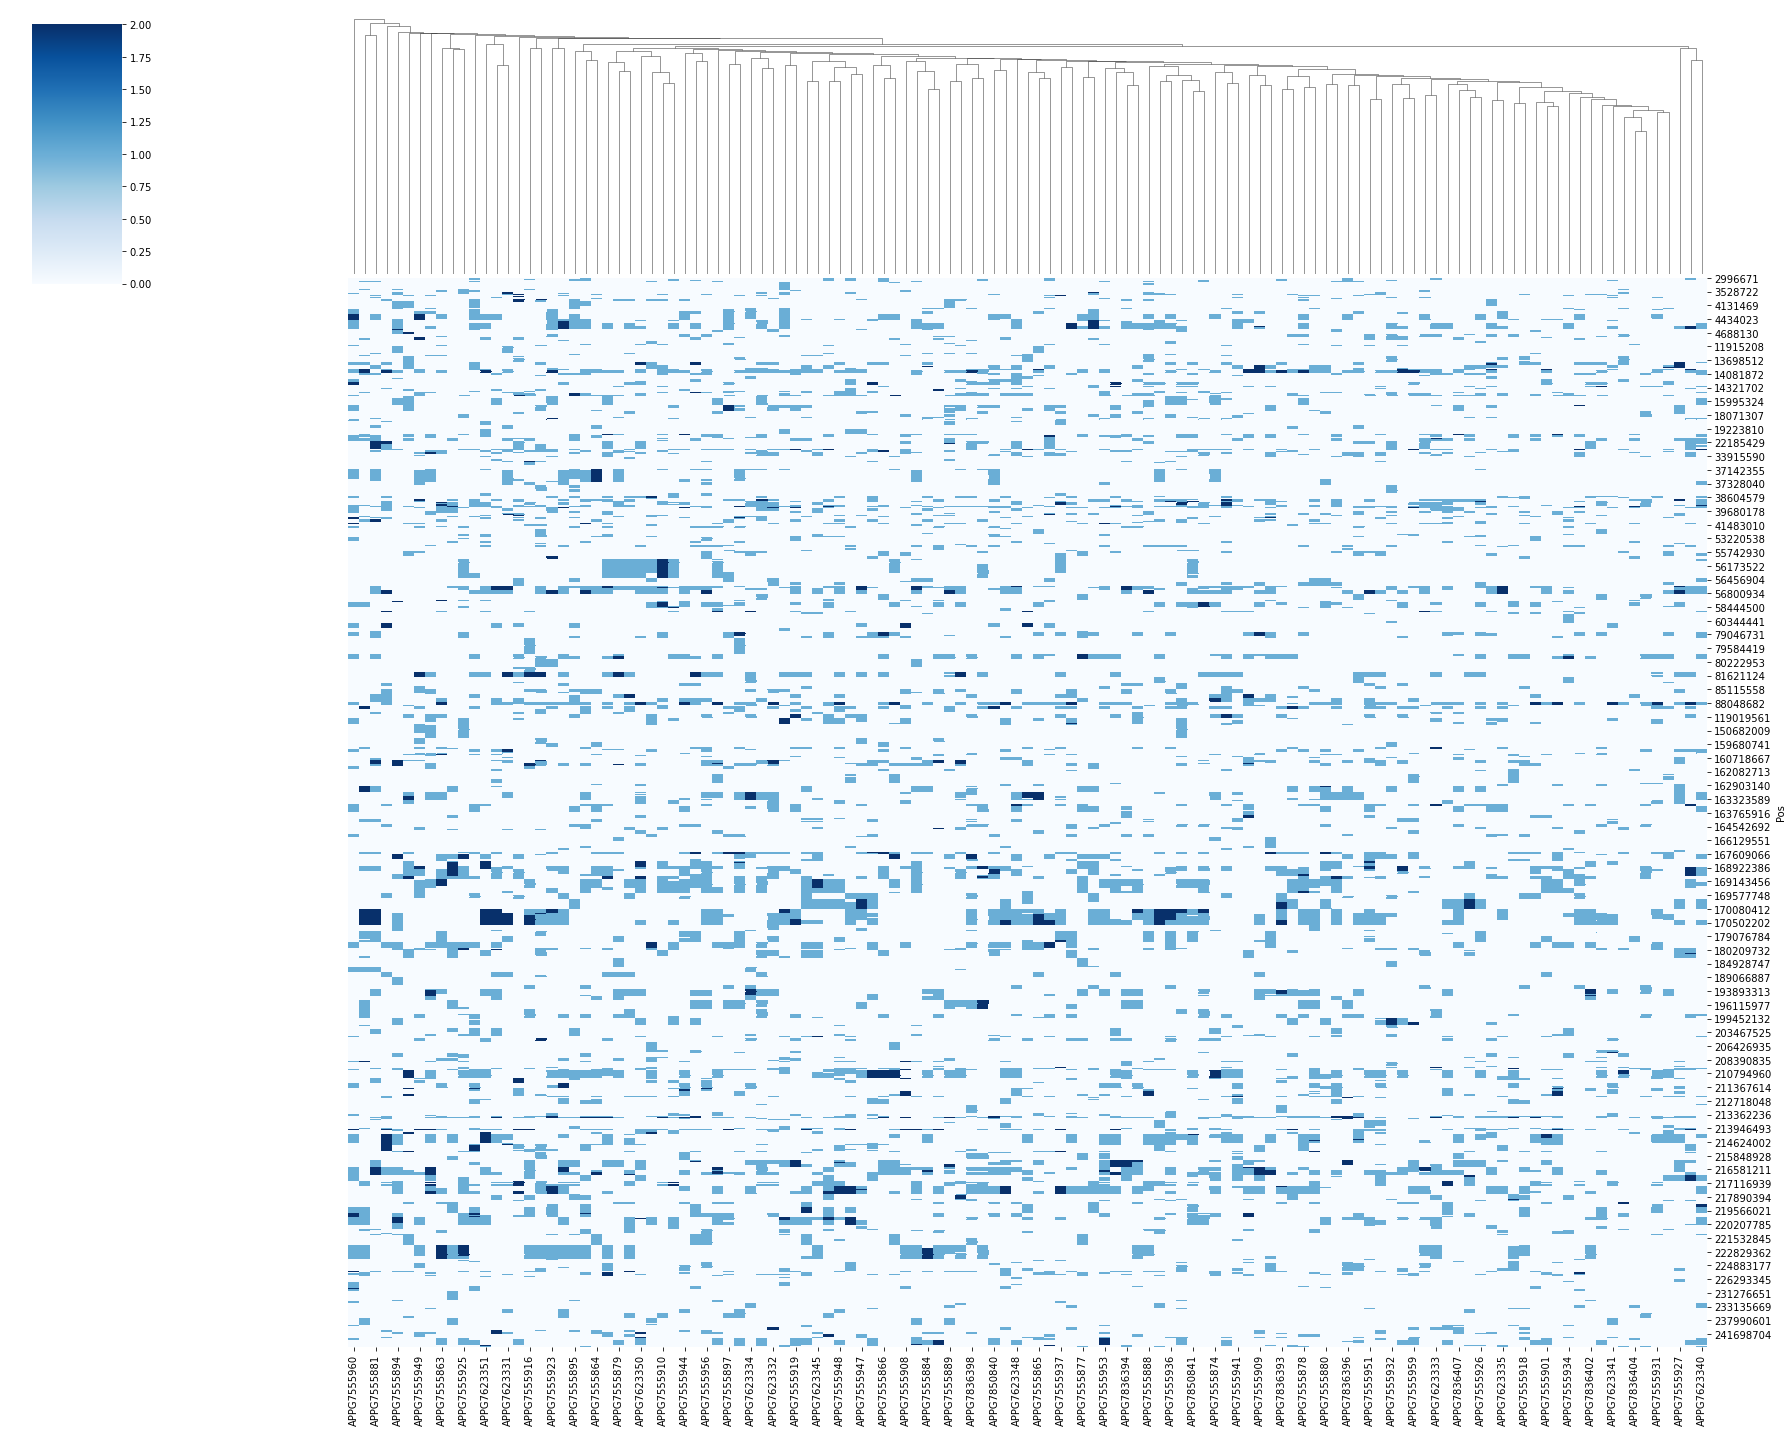

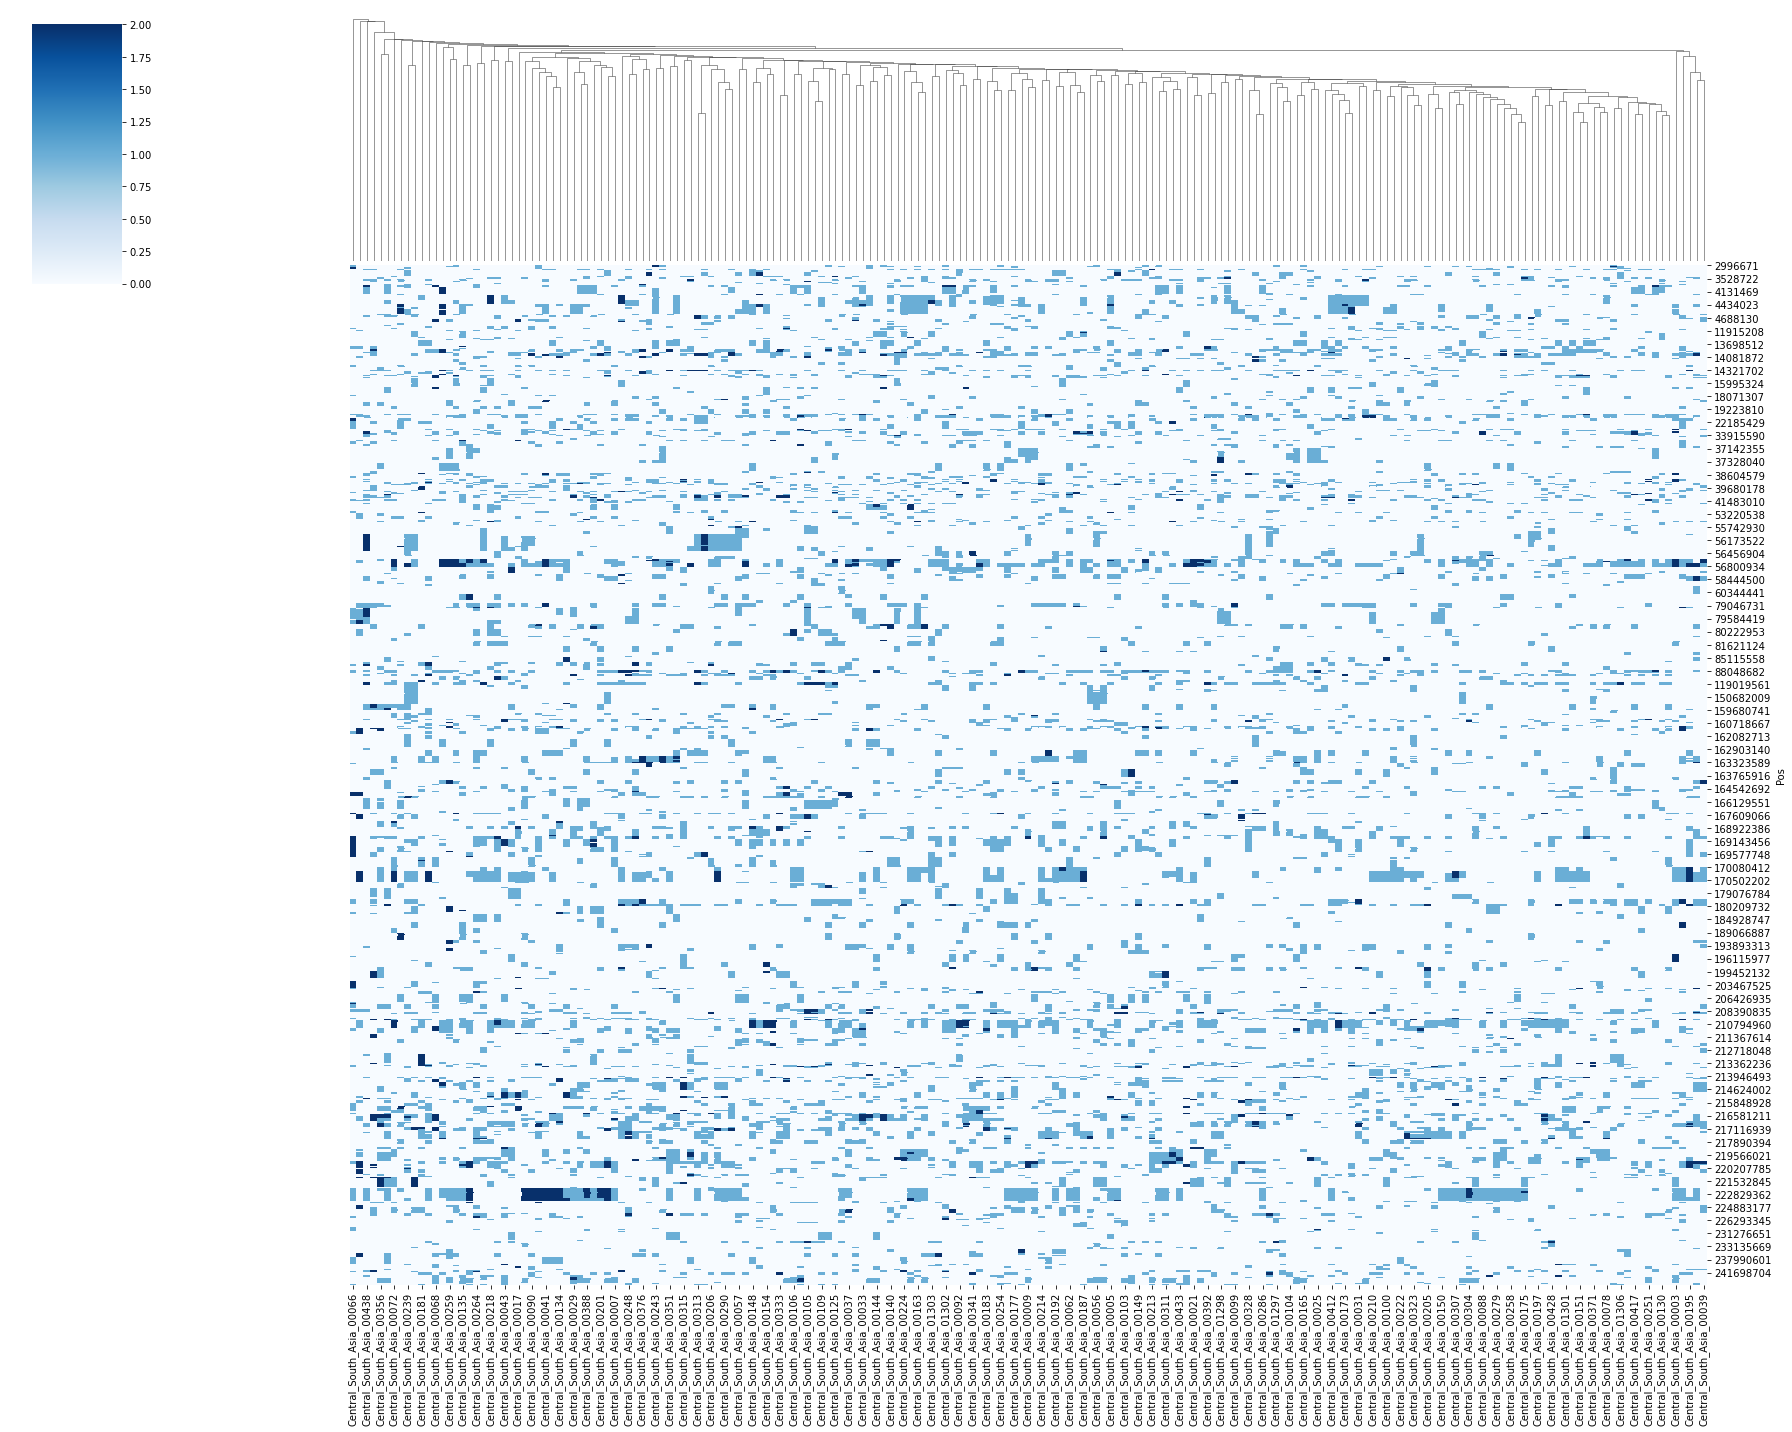

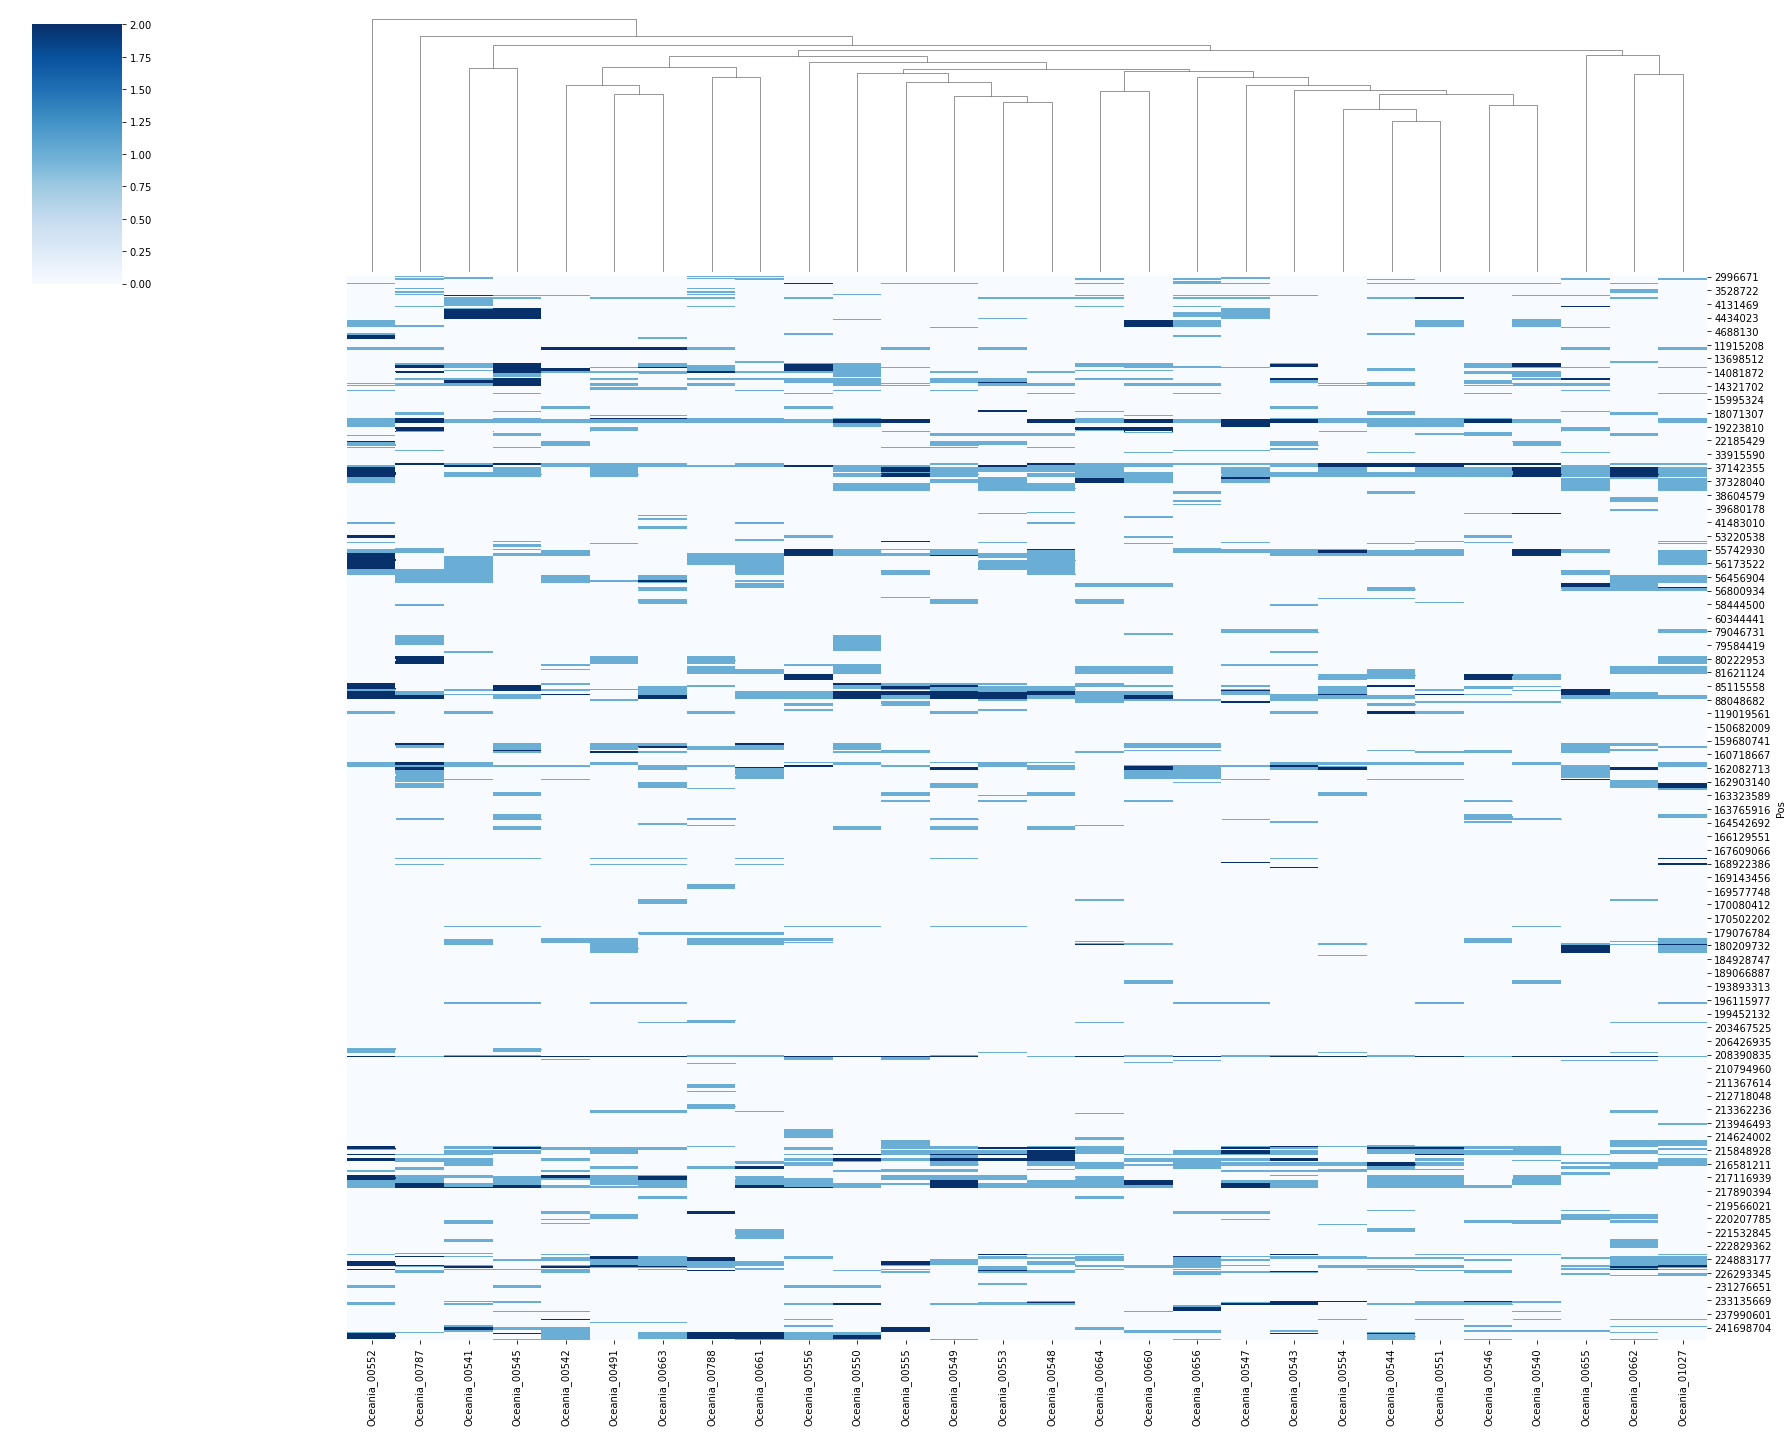

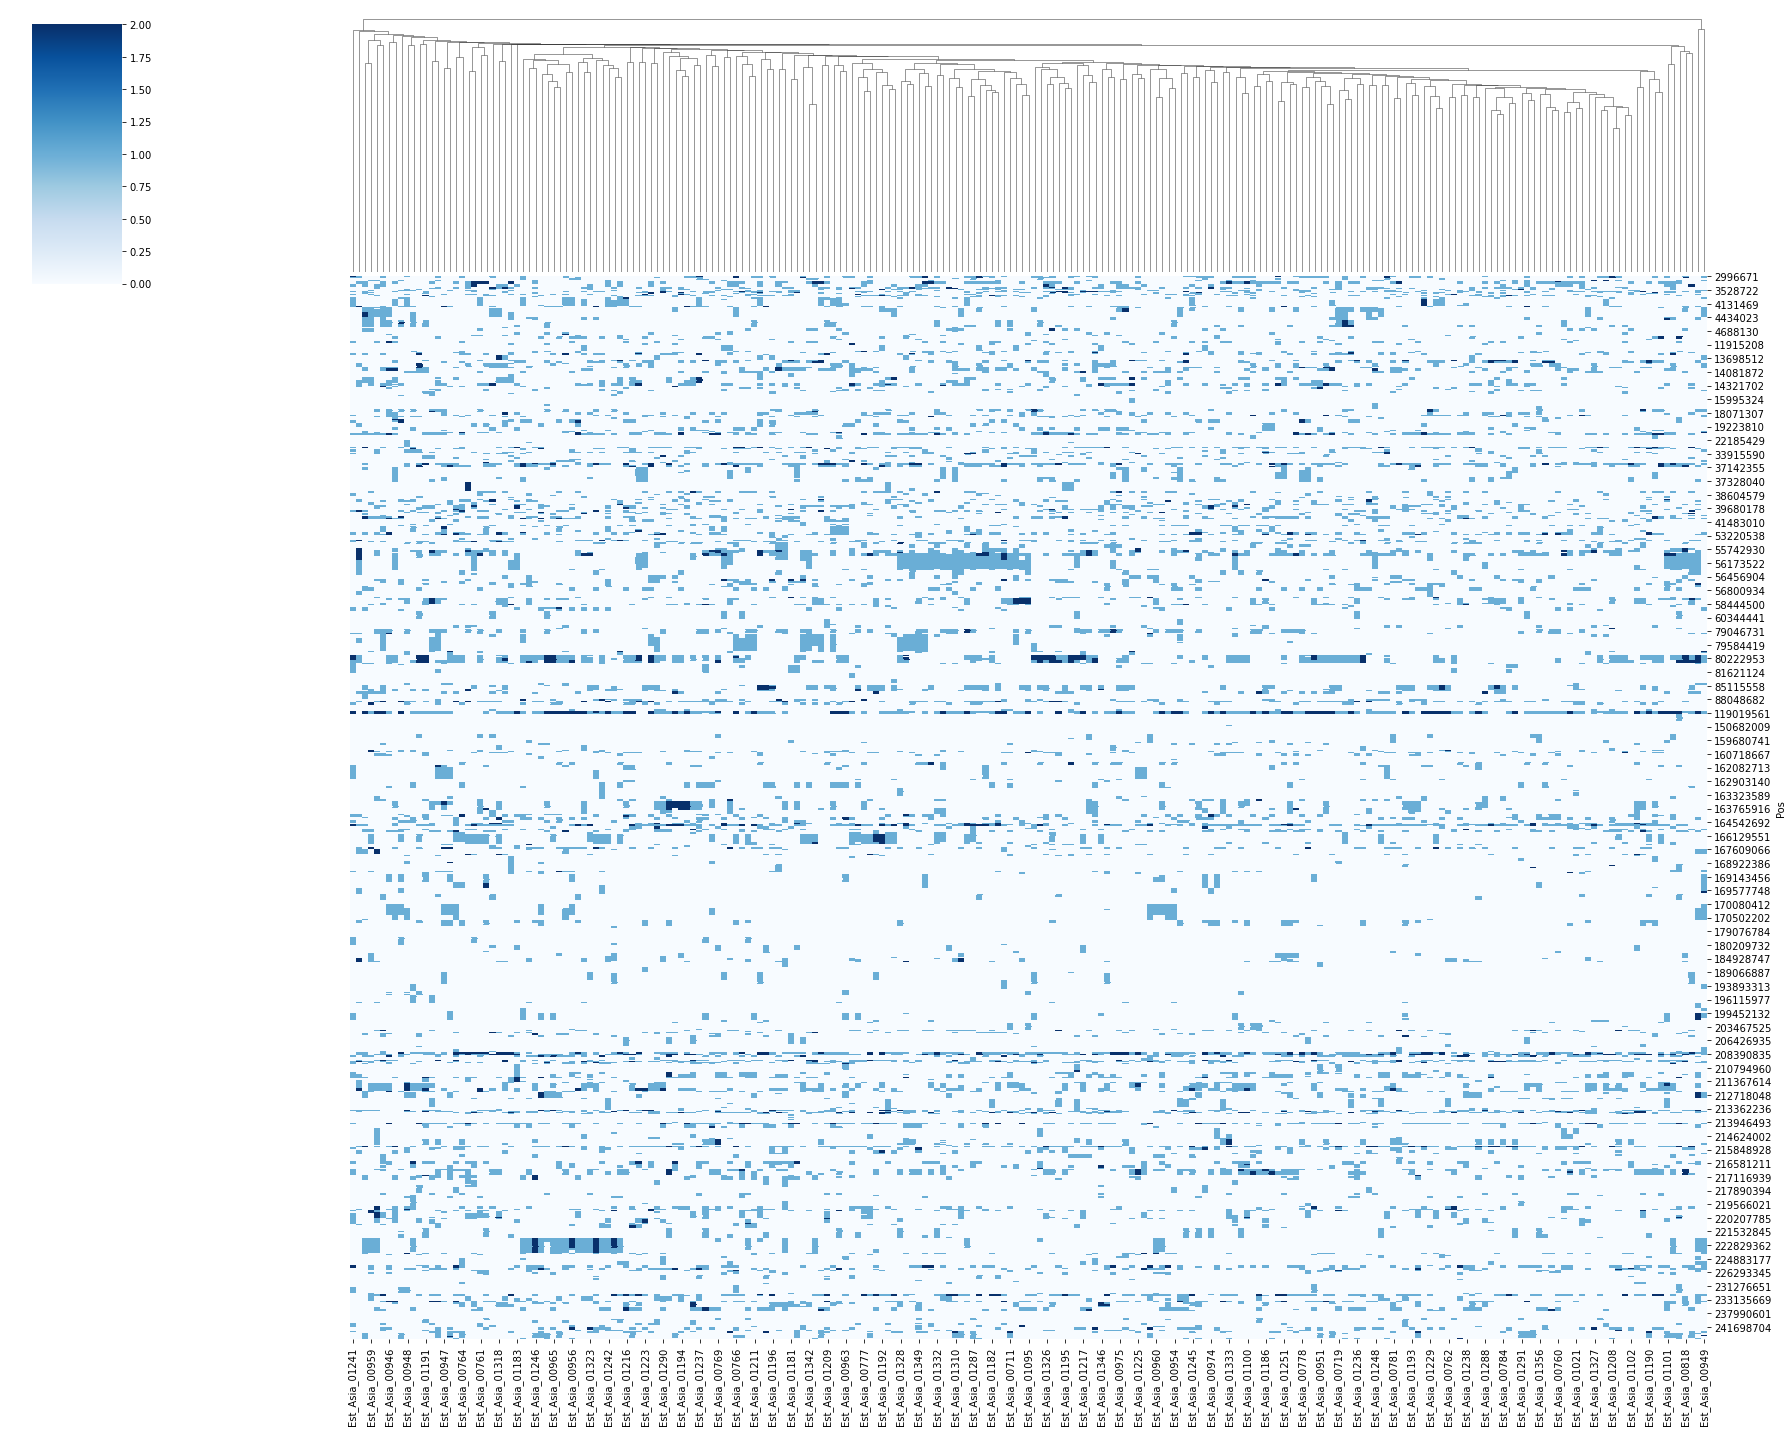

In [127]:
for sel in 'Europe Africa Yemen Middle_Est APPG Central_South_Asia Oceania Est_Asia'.split():
    colsel = [col for col in chr22.columns.values if col.startswith(sel)]
    cm = sns.clustermap(chr22[colsel], row_cluster=False, figsize=(25,20), cmap="Blues")
    svgfile = f'heatmap_{sel}_chr22.svg'
    cm.savefig(svgfile)
    print(f"Created {svgfile}")

In [81]:
cm.savefig

/Users/ahenschel/Dropbox/PythonBridgeCourse/AI


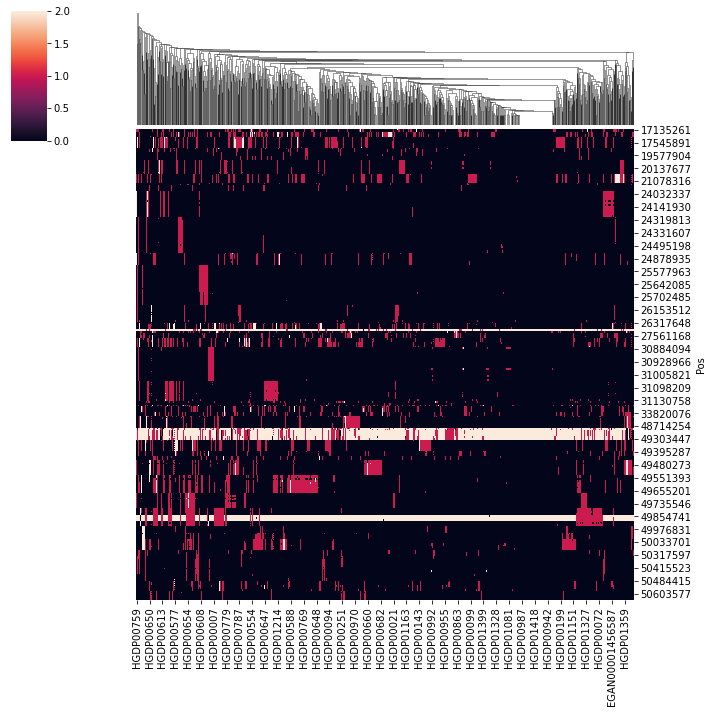

In [50]:
hgdp=range(45,45+929)
sns.clustermap(chr22.iloc[:,hgdp], row_cluster=False)

In [45]:
import seaborn as sns

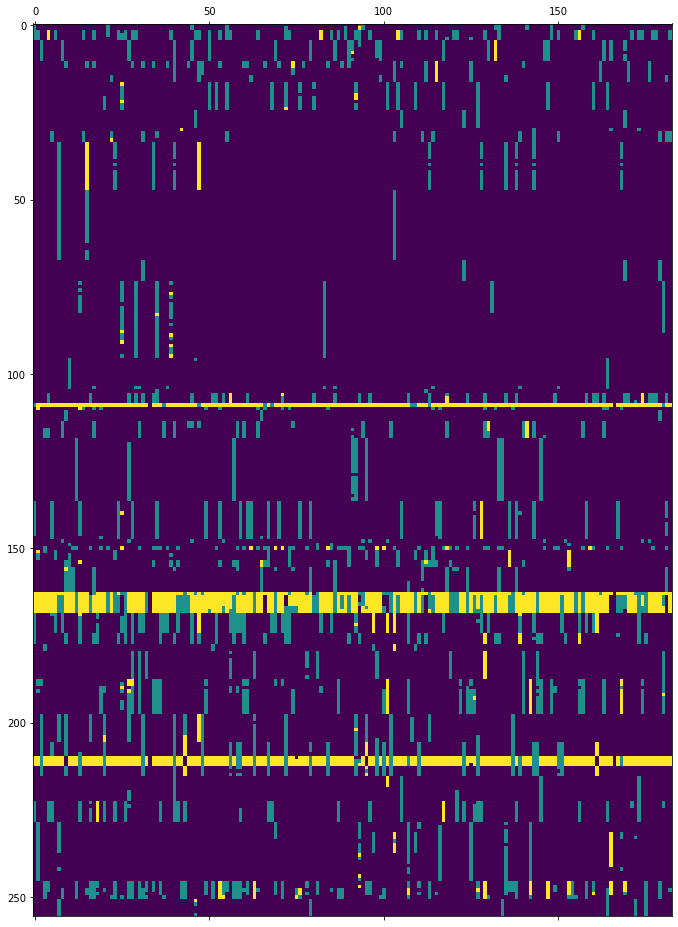

In [44]:
a=chr22.to_numpy()
yemenDubai=a[:,list(range(45))+list(range(45+929,1112))]
plt.matshow(yemenDubai)

In [34]:

chr22.sum(axis=0)

EGAN00001456627                                    49.0
EGAN00001456593                                    49.0
EGAN00001456774                                    40.0
EGAN00001456680                                    32.0
EGAN00001456573                                    41.0
                                                   ... 
longranger222_wgs_27726_APPG7623347_GRCh38_gatk    26.0
longranger222_wgs_27726_APPG7623348_GRCh38_gatk    37.0
longranger222_wgs_APPG7623349_GRCh38_gatk          52.0
longranger222_wgs_27726_APPG7623350_GRCh38_gatk    35.0
longranger222_wgs_27726_APPG7623351_GRCh38_gatk    27.0
Length: 1112, dtype: float64